# Perogi's Emotions Classification Model
## Convolutional Neural Network with Transfer Learning and Fine-Tuning

#### Notebook by [Doug Andrade](https://www.linkedin.com/in/douglasrandrade/), May 2024

#### Model testing in progress

2024-06-17 00:37:02.060798: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 00:37:02.061170: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 00:37:02.133037: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-17 00:37:02.332074: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 00:37:04.459566: W tensorflow/compiler/tf2

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

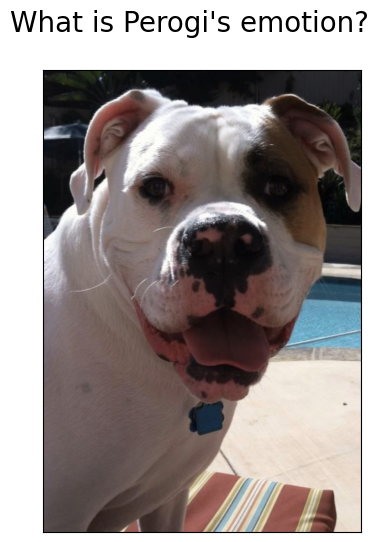

In [1]:
from PIL import Image
import numpy as np
from skimage import transform
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (128, 128, 3))
   np_image = np.expand_dims(np_image, axis = 0)
   return np_image

# Set new plot subclasses to iterate over random predictions
fig, ax = plt.subplots(figsize = (10, 6))
fig.suptitle('What is Perogi\'s emotion?', size = 20)
ax.remove()

plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.imshow(load_img(r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images/IMG_7415.jpg'))

plt.tight_layout


## Project Overview

### Motivation
The motivation of this project is to explore the application of Convolutional Neural Network (CNN) modeling with `Keras` and `TensorFlow` using a single NVIDIA graphics processing unit (GPU). After the passing of my wife's American Bulldog, Perogi, my wife inspired me to leverage this project to classify images of Perogi's life with particular interest in efficiently sorting out his happiest moments.

### Image Dataset
The project intended to begin with the simple but manually intensive approach of building a personally designed `Tensorflow` CNN model trained on $100$ manually labeled images of Perogi. However, I came across a labeled dataset on Kaggle's [Dog Emotions Prediction](https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction) dataset, which came with $15,921$ images stored within four labeled sub-directories *angry*, *happy*, *relaxed*, *sad* ([Devzohaib, 2022](#ref4)).

##### Data Set Exploration and Preparation
On initial image visualization and data exploration, it became apparent that the "Dog Emotion" images were inconsistently labeled, likely due to varied and biased opinions of what an *angry*, *happy*, *relaxed*, *sad* dog looks like. There were $6,596$ images of animals other than dogs, such as cartoons, lions, cats, monkeys, cows, horses, rabbits, etc. Consequently, I elected to manually re-label images based on consistent and objective emotional features, with an additional fifth class - *alert*. For ease of coding to associate directory-labeled titles with one-hot encoding, I adjusted the label names to have exactly five characters each, for a final dataset total of $9,325$ images:
- *alert* - The appearance of vigilance and attention toward something (wide eyes, stiff ears, rigid body).
- *angry* - The appearance of growling, with an aggressive display of teeth.
- *frown* - The appearance of dejection, pain, or abuse.
- *happy* - The display of the tongue, with a near human-like appearance of a smile.
- *relax* - Laying down or having the appearance of resting or doing nothing in particular.
        
$6,596$ images were removed for three reasons: 
- Images other than a real dog.
- The dog's face was not visible (i.e., facing away from the camera).
- It did not reasonably fall within one of the five classes (too unique, distorted, an outlier type emotion, etc.). 

This effort was an extremely slow and time-consuming process that took over three months; however, it underlined the criticality of data quality and maintenance to design a useful classification model ([Andrade, 2024](#ref1)).

The dataset was split into $80\%$ training and $20\%$ validation, and randomly shuffled to maximize each dataset’s combination of classes. The images are instantiated to a red, green, blue (RGB) color model of three-dimensional size ($128x128x3$).

### Model Development
I used transfer learning and model fine-tuning to maximize my computer resources for optimal modeling performance. To establish a baseline model standard and to validate my model development approach, I built and tested a basic CNN model inspired by the VGGNet, as described in John Krohn ([Krohn, 2020, p.178](#ref8)).

For the transfer learning CNN model, I selected the `EfficientNetV2S` model for its heuristic development as a small model ($6.8$ times smaller than other models trained on the ImageNet dataset) with improved training speed and parameter efficiency ([Tan, 2021](#ref10)). I iterated over various combinations of fully connected dense layers added on top of `EfficientNetV2S`, while constraining the model training with categorical cross-entropy minimization, learning rate reduction, and early stopping callback features ([TensorFlow EfficientNetV2S API](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetV2S)).

Fine-tuning development was centered around finding the optimal `EfficientNetV2S` layer to be to unfrozen once the transfer learning training phase was completed ([Chollet, 2024](#ref3); [Krohn, 2020, p.188](#ref8)).

### Model Evaluation
A combination of metrics plotting (training and validation accuracy, categorical cross-entropy, and F1 Score), confusion matrix visualization (for class F1 Scoring), as well as a metrics record table were used to evaluate model performance ([Chollet, 2021, chap.8](#ref2); [Krohn, 2020, chap.10](#ref8)).

### Practical Evaluation
The final assessment, after a satisfactory model evaluation, was to allow my wife to observe how the model classified images of Perogi.

## Project Outline<a id='outline'></a>

1. [Problem Statement and Objectives](#step1)
2. [Modeling Metrics](#step2)
3. [Load Required Modules](#step3)
4. [Set-Up the Python Environment](#step4)
5. [Load and Preview the Data](#step5)
6. [CNN Transfer Learning Model Design](#step6)
    1. [CNN Model Parameters](#step6.a)
    2. [CNN Callback Features](#step6.b)
    3. [Baseline Model Design](#step6.c)
    4. [CNN Transfer Learning Model set-up](#step6.d)
    5. [Train the CNN Transfer Learning Model](#step6.e)
    6. [CNN Transfer Learning Model Performance Analysis](#step6.f)
7. [CNN Fine-Tuning Model Design](#step7)
    1. [CNN Fine-Tuning Model Set-Up](#step7.a)
    2. [Train and Fine-Tune the CNN Transfer Model](#step7.b)
    3. [Fine-Tuned CNN transfer learning model performance analysis](#step7.c)
    4. [Display Predicted Emotions from Validation Set](#step7.d)
8. [Final CNN Model Confusion Matrix](#step8)
9. [Final CNN Model Evaluation on Unseen Images of Perogi](#step9)
10.  [Project Summary and Metrics History Review](#step10)

[References](#ref)

## Problem Statement<a id='step1'></a>
Create a CNN model that appropriately labels $202$ unseen images of my wife's late American Bulldog, Perogi. 

#### The data preparation, model design and training plan:
1. Manually clean and re-label Kaggle's [Dog Emotions Prediction](https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction) dataset into five classes (*angry*, *happy*, *pouty*, *relax*, *frown*), and randomly split into $80\%$ train and $20\%$ validation images. The cleaned, five-class image dataset can be accessed from [Kaggle: Dog Emotions - 5 Classes](https://www.kaggle.com/datasets/dougandrade/dog-emotions-5-classes).
2. Establish basic initial image size and modeling parameters to test a simple model's functionality and performance.
    - I started with common and standard parameters:
        - $128x128x3$ image size for RGB
        - $128$ batch size.
        - $100$ epoch limit.
        - ReLU activation layer.
        - softmax output layer.
3. Build a baseline CNN model.
    - I built a baseline model inspired by VGGNet16 - the highly popularized model from the 2014 ImageNet Large Scale Visual Recognition Challenge, which introduced efficient small kernel sizes for deep CNN layers ([Krohn, 2020, p. 178](#ref8)).
    - The purpose of the baseline model is to gain an initial observation of how certain model architectures and parameters perform with the training data. 
    - The baseline model performance metrics were not a priority or evaluated, since it is expected that transfer learning with fine tuning on the final model will easily out-perform the baseline model. 
4. Build a transfer learning model using Google's designed EfficientNetV2S, with performance observations noted during the baseline model evalualtion.
    - Apply image augmentation to maximize training effectiveness on the limited training dataset size.
        - `RandomRotation` - image rotation up to $45^\circ$.
        - `RandomFlip` - flipping image across the vertical axis.
    - Tune `Conv2D` and `Dense` layer hyperparameters to improve validation accuracy and training efficiency.
    - Add and test with overfitting control layers.
        - Pooling layers (`MaxPool2D` and `AveragePooling2D`).
        - `BatchNormalization` layers.
        - `Dropout` layers of various ratios.
    - Visualize the training and validation results.
    - Iterate over various comination of top fully connected layers, channels, dropout and regularization controls.
5. Apply fine-tuning to improve the model's validation accuracy.
    - Iteratively unfreeze different `EfficientNetV2S` bottom layers for weight adjustment and evaluate model improvement.
6. Create the final training and validation performance plots.
    - Update the metrics plot.
    - Visualize examples of predictions versus actual labels.
    - Create a confusion matrix.
7. Apply the model on the $202$ unseen images of Perogi and provide a sample visual of Perogi and the predicted labels.
8. Test for the classification of the opening image of Perogi and customer satisfaction.

#### Desired Objective
The primary intent of the project was for self-learning and to develop an independent understanding of deep learning applications. The project ultimately achieved this intent and provided a deeper understanding of how a CNN model is designed and built. The ability to design a model to effectively recognize dog facial emotions on a personal laptop with a single GPU by leveraging transfer learning and fine tuning proved highly pragmatic.

The secondary objective was to satisfy a series of performance metrics (prioritized):
1. Consistently classify the opening image of Perogi as *happy*
2. Achieve a validation accuracy $>= 70\%$ 
3. Achieve a class F1-Scores $>= 25\%$

[Return to the Project Outline](#outline)

## Performance Metrics<a id='step2'></a>
Validation accuracy and validation categorical cross-entropy were the primary metrics applied to the model training, to achieve better performance than simple chance to predict one of five labels ($>20\%$ accuracy) with the lowest categorical cross-entropy value.

- The Loss Function, also known as the objective function, is the model performance metric that will be calculated during each epoch of training to measure model performance. Entropy is the measure of uncertainty of the model's true predictions. Categorical cross-entropy is specifically applied to measure multi-classification problems with one-hot encoded labels. The model with the lowest entropy represents true predictions with the least uncertainty and therefore of the most confidence ([TensorFlow Categorical Cross-Entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy); [Krohn, 2020, p.113](ref8)).

- Optimizer Function is the function that will be applied to attempt to find the model's objective global minimum, using stochastic gradient descent (`SDG`) - the tensor equivalent of calculating the derivative of a scalar function or slope applied on random mini-batches across a large neural network. Root Mean Squared Propagation (`RMSProp`) is the specific optimizing function applied to minimize the loss function, which is an efficient adaptation of `SGD`. An improved extension to `RMSProp`, the adaptive moment estimate (`Adam`) is computationally efficient and well-suited for problems that are large in terms of data and parameters ([TensorFlow Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers); [Kingma, 2014](ref7)).

- The monitoring metric to evaluate modeling training performance is accuracy. Accuracy is defined as the total number of predicted True Positives and True Negatives divided by the total data set size. This metric was preferred because I wanted to optimize the model weights based on the best possible accuracy while measuring loss based on the best possible cross-entropy ([TensorFlow Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)).

- An additional monitoring metric, F1 Score was primarily used to evaluate each of the five classes' prediction success. F1 Score was also partially used as a balancing metric to overall accuracy and categorical cross-entropy, mainly to observe the behavior of the metrics relative to the other metrics across epochs. F1 Score is the harmonic mean of precision and recall, suitable for multi-classification ([TensorFlow Metrics F1 Score](https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/F1Score)). Precision describes the ratio of true positive predictions, while recall describes the ratio of actual positives that were correctly predicted. F1 Score is useful since it is a balance of both metrics.

[Return to the Project Outline](#outline)

## Required Modules<a id='step3'></a>
- `Keras` and `TensorFlow` are the primary modules used to perform CNN deep learning. Of particular interest is the decision to apply CNN transfer learning using the [EfficientNetV2S CNN model](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet_v2/EfficientNetV2S) weights available through `Keras`. 

- `Matplotlib` was the visualization library used for plotting the training and validation performance, validation image predictions, and Perogi image classifications. I applied the `ggplot` style, popular in R programming.

- `sklearn` or "scikit learn" was used for data preprocessing and evaluation (confusion matrix).

[Return to the Project Outline](#outline)

In [2]:
import os
import cv2
import random
import datetime   
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sys # to check the version of Python

# scikit learn modules for model confusion matrix evaluation
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from keras import backend as K #for clearing out Tensorflow memory resources
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras import mixed_precision
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.mixed_precision import Policy, set_global_policy
from tensorflow.keras.preprocessing.image import load_img

# Loading data sets 
from keras.utils import image_dataset_from_directory

# Callbacks
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.callbacks import ModelCheckpoint, TensorBoard

# Transfer Learning models
from keras.applications.vgg19 import VGG19
from keras.applications.efficientnet_v2 import EfficientNetV2S

# Model layers
from keras.models import Sequential
from keras.layers import Input, Rescaling, RandomRotation, RandomTranslation, RandomContrast
from keras.layers import RandomFlip, Conv2D, MaxPool2D, AveragePooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Dropout, Flatten, Dense

## Set Up the Python Environment<a id='step4'></a>
The intent of this step is to:
- Check the versions of `Python` and `TensorFlow` loaded.
- Confirm the `TensorFlow` installation is supported by NVIDIA's Compute Unified Device Architecture (CUDA).
    - CUDA is a software framework developed by NVIDIA to expand the capabilities of GPU acceleration. It allows developers to access the raw computing power of CUDA GPUs to process data faster than with traditional CPUs. ([GeeksforGeeks Introduction to CUDA](https://www.geeksforgeeks.org/introduction-to-cuda-programming/))
- Clear any computational graph and resources to prevent the accumulation of unused memory.
- Confirm my machine's NVIDIA GPU is available and configured to run `TensorFlow` operations.
- Limit `TensorFlow` to dynamically allocate only the necessary memory required by the GPU only when needed, ensuring GPU memory is not consumed unnecessarily all at once.
- Apply `mixed_precision` to default to lower precision operations $16$-bit `dtypes` (`float16`) when higher precision operations (`float32`) are not necessary. NVIDIA GPUs run efficiently on $16$-bit `dtypes` based on their hardware. `mixed_precision` allows for `Keras` to execute higher precision operations when necessary, affording an optimal computation efficiency for deep neural network training. ([Chollet, 2021, ch.13.2](#ref2), [TensorFlow Mixed Precision](https://www.tensorflow.org/guide/mixed_precision))

[Return to the Project Outline](#outline)

In [3]:
print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)

Python version: 3.11.5 (main, Sep 11 2023, 13:54:46) [GCC 11.2.0]
TensorFlow version: 2.15.0


In [4]:
# Check that the TensorFlow installation is built with NVIDIA's CUDA support for deep learning parallel computing
if tf.test.is_built_with_cuda():
    print("TensorFlow was built with CUDA support.")
else:
    print("TensorFlow was not built with CUDA support.")

TensorFlow was built with CUDA support.


In [5]:
tf.config.list_physical_devices('GPU')

2024-06-17 00:37:10.062225: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-17 00:37:10.578325: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-17 00:37:10.578446: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.mixed_precision import Policy, set_global_policy

# Clear/reset the computational graph and release/free-up Tensorflow memory resources
K.clear_session()

# Limit GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            print(f"Set memory growth for GPU: {gpu}")
    except RuntimeError as e:
        print(e)

# Set mixed precision for computational efficiency
try:
    policy = Policy('mixed_float16')
    set_global_policy(policy)
    print("Mixed precision policy set to 'mixed_float16'")
except Exception as e:
    print(e)

Set memory growth for GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2060, compute capability 7.5
Mixed precision policy set to 'mixed_float16'


2024-06-17 00:37:10.596911: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2024-06-17 00:37:10.630375: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-17 00:37:10.630554: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-17 00:37:10.630609: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-17 00:37:11.237998: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-17 00:37:11.238264: I external/local_xla/xla/stream_executor

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14921020801675566232
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4254072832
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15776351680901976435
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


## Load and Preview the Data<a id='step5'></a>
During this step of the process, the intent is to understand the data that will be used to train and validate the model. The desired dataset characteristics are the following:
- Training images that can generalize well for predicting on unseen images.
- Create equal or "stratified" class distributions for training and validation.
- Training images of equal size, color mode, and features (face of each dog is visible and interpretable).
- Training images that are properly labeled, based on the criteria mentioned in the introduction.


The data's directory structure is organized under a parent folder, and further subdivided into five distinct folders based on the labeled classification.

`image_dataset_from_directory` returns a `tf.data.Dataset` object yielding a tuple `(images, labels)`, with the specified color mode (RGB), batch size, and image size ([Chollet, 2021, p.217](#ref2)).

The data is split $75\%$ for training and $25\%$ for validation within the `image_dataset_from_directory` function.

[Return to the Project Outline](#outline)

In [8]:
# Basic dataset loading parameters
seed        = 42
img_dir = r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/train_images_5_class'
img_size    = 128
batch_size  = 128

In [9]:
ds_train = image_dataset_from_directory(
    directory = img_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['alert', 'angry', 'frown', 'happy', 'relax'],
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = True,
    validation_split = 0.25,  # Split 25% of the data for validation
    subset = 'training',
    seed = 42
)

Found 9325 files belonging to 5 classes.
Using 6994 files for training.


2024-06-17 00:37:16.720740: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-17 00:37:16.721192: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-17 00:37:16.721284: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-17 00:37:16.721630: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-17 00:37:16.721651: I tensorflow/core/common_runtime/gpu/gpu

In [10]:
ds_val = image_dataset_from_directory(
    directory = img_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['alert', 'angry', 'frown', 'happy', 'relax'],
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = True,
    validation_split = 0.25,  # Split 25% of the data for validation
    subset = 'validation',
    seed = 42
)

Found 9325 files belonging to 5 classes.
Using 2331 files for validation.


In [11]:
# Check image shape and label shape
#class_names = ds_train.class_names
class_names = ['alert', 'angry', 'frown', 'happy', 'relax']
for image_batch, labels_batch in ds_train:
  print('Image shape: ', image_batch.shape)
  print('Label shape: ', labels_batch.shape)
  print('Label names: ', class_names)
  break

Image shape:  (128, 128, 128, 3)
Label shape:  (128, 5)
Label names:  ['alert', 'angry', 'frown', 'happy', 'relax']


In [12]:
# Print the file size of each class, for distribution comparison
for class_name in class_names:
    class_path = os.path.join(img_dir, class_name)
    if os.path.isdir(class_path):
        file_count = len(os.listdir(class_path))
        print(f'Total files in {class_name}: {file_count}')

Total files in alert: 1865
Total files in angry: 1865
Total files in frown: 1865
Total files in happy: 1865
Total files in relax: 1865


#### Review the Class Distribution<a id='step5.1'></a>
- I found the `image_dataset_from_directory` would not produce perfectly stratified class distributions in both the training and validation sets, likely due to the `shuffle = TRUE` parameter. To mitigate this, I found that hard-coding a `seed` within the `image_dataset_from_directory` function (versus outside of the function) helped to reduce class imbalance. 

- While the hard-coding approach seemed to significantly improve the distribution, it is not perfectly equal which is a potential cause of bias during model training toward the classes with the largest training population.

- To further mitigate any class bias during training, I set up a dictionary of class weights based on the training class distribution, to be applied during model training. 

[Return to the Project Outline](#outline)

In [13]:
# Create a function to count the class distribution for the training and validation sets
def class_distribution_string(dataset, class_names):
    class_counts = {}
    for _, labels_batch in dataset:
        for label in labels_batch.numpy():
            class_name = class_names[label.argmax()]  # Convert one-hot encoded label to class name
            if class_name in class_counts:
                class_counts[class_name] += 1
            else:
                class_counts[class_name] = 1
    
    # Convert class counts to a text string
    result_string = "\n".join([f'Total files in {class_name}: {count}' for class_name, count in class_counts.items()])
    
    return result_string

# Get and print the class distribution for the training dataset
train_distribution = class_distribution_string(ds_train, class_names)
print("Training Set Class Distribution:")
print(train_distribution)

# Get and print the class distribution for the validation dataset
val_distribution = class_distribution_string(ds_val, class_names)
print("\nValidation Set Class Distribution:")
print(val_distribution)

Training Set Class Distribution:
Total files in relax: 1397
Total files in angry: 1399
Total files in alert: 1386
Total files in happy: 1415
Total files in frown: 1397

Validation Set Class Distribution:
Total files in alert: 479
Total files in frown: 468
Total files in relax: 468
Total files in happy: 450
Total files in angry: 466


/tmp/ipykernel_284421/1939276329.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_284421/1939276329.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


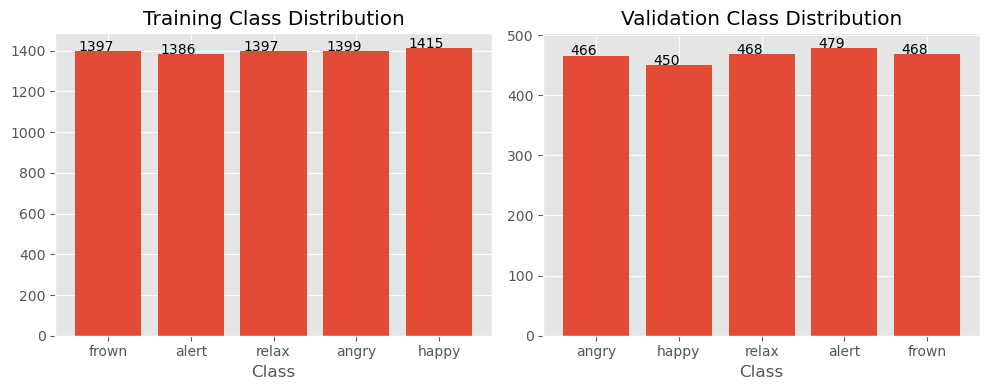

In [14]:
# Function to count class distribution
def class_distribution(dataset, class_names):
    #global class_counts
    class_counts = {}
    for _, labels_batch in dataset:
        for label in labels_batch.numpy():
            class_name = class_names[label.argmax()]  # Convert one-hot encoded label to class name
            if class_name in class_counts:
                class_counts[class_name] += 1
            else:
                class_counts[class_name] = 1
    return class_counts

# Function to plot the class distribution
def plot_class_distribution(dataset, class_names):
    class_counts = class_distribution(dataset, class_names)
    
    #fig, ax = plt.subplots()
    bars = plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Class')
    #plt.ylabel('Count')
    plt.title('Image Class Distribution')
    
    # Add class count as text overlay on each bar
    for bar, value in zip(bars, class_counts.values()):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, 
                 bar.get_height() + 0.2, 
                 str(value), 
                 ha = 'center', 
                 color = 'black')
    plt.tight_layout()

# Plot the class distribution for the training dataset
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plot_class_distribution(ds_train, class_names)
plt.title('Training Class Distribution')

# Plot the validation class distribuition
plt.subplot(1, 2, 2)
plot_class_distribution(ds_val, class_names)
plt.title('Validation Class Distribution')

plt.tight_layout()
plt.show()

In [15]:
train_class_dist = class_distribution(ds_train, class_names)

weights = []
for i in train_class_dist.values():
    w = i / sum(train_class_dist.values())
    weights.append(w)
    
class_weight = dict(zip([0, 1, 2, 3, 4], weights))

#### Preview of Training Images
- Provided is a final review of the training data's label quality - a visual evaluation of 16 random images and their assigned label. 
- Initial review of the original dataset during this step revealed how poorly labeled the images were. Additionally, I learned the original dataset contained $6,596$ entities other than dogs or without the dog's face visible.
- I manually relabeled each image over a couple months to attempt to improve the dataset quality for training a CNN model. While the dataset (in my opinion) is vastly improved, it is still very subjective and heavily biased toward my opinion of what an *alert*, *angry*, *frown*, *happy*, and *relax* dog looks like.

[Return to the Project Outline](#outline)

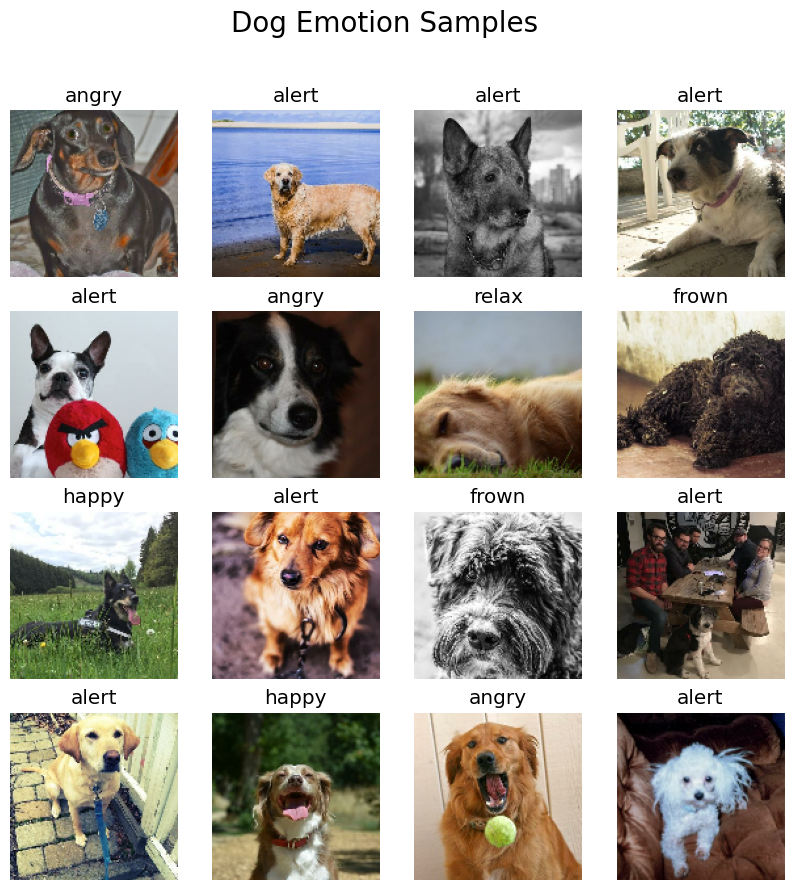

In [16]:
# Sample 16 random images for the training data set with their labels
plt.figure(figsize = (10, 10))
for images, labels in ds_train.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(ds_train.class_names[int(tf.where(labels[i] == 1).numpy())])
    plt.suptitle('Dog Emotion Samples', fontsize = 20)
    plt.axis("off")

## CNN Transfer Learning Model Design<a id='step6'></a>

#### Baseline CNN Model<a id='step6.a'></a>
I built a baseline CNN model inspired by the Visual Geometry Group's 16-layer VGGNet "D" model ([Krohn, 2020, p.178](#ref8); [Simonyan, 2015](#ref9)). The original VGGNet16 D model required an image size of $224$ x $224$ to be passed through $13$ two-dimensional CNN layers grouped by five-channel (width) groups and two fully connected layers. Each set of channels has a max pooling layer and a batch normalization layer.

[Return to the Project Outline](#outline)

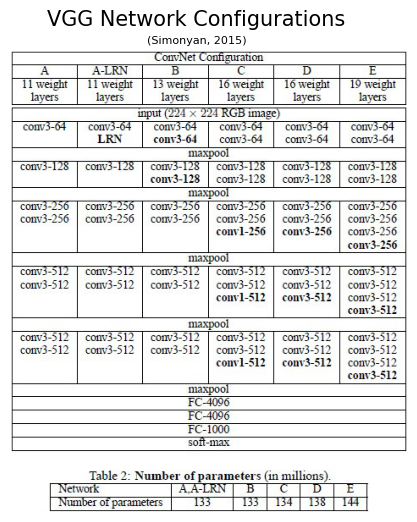

In [17]:
# Set new plot subclasses to iterate over random predictions
fig1, ax1 = plt.subplots(figsize = (10, 6)); plt.grid(False); plt.xticks([]); plt.yticks([])

plt.imshow(load_img(r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/VGGNets_table.jpg'))

# Main title and subtitle
fig1.text(0.5, 0.92, 'VGG Network Configurations', ha = 'center', fontsize = 15)
fig1.text(0.5, 0.89, '(Simonyan, 2015)', ha = 'center', fontsize = 8)

plt.tight_layout; plt.show()

In [18]:
# Autotune dynamically to prefetch (read) data in parallel while training
AUTOTUNE = tf.data.AUTOTUNE

# Cache the data in memory for effificent training across epochs
ds_train = ds_train.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
ds_val = ds_val.cache().prefetch(buffer_size = AUTOTUNE)

In [19]:
baseline_CNN = Sequential([
    Input(shape = (img_size, img_size, 3)),
    
    # First CNN layer and MaxPooling layer
    Conv2D(filters = 32, kernel_size = (3, 3), activation  = 'relu',
           input_shape = (128, 128, 3)),
    MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    BatchNormalization(),
    
    # Second CNN Layer and MaxPooling layer
    Conv2D(filters = 64, kernel_size = (3, 3), activation  = 'relu'),
    Conv2D(filters = 64, kernel_size = (3, 3), activation  = 'relu'),
    MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    BatchNormalization(),
    
    # Third CNN Layer and MaxPooling layer
    Conv2D(filters = 128, kernel_size = (3, 3), activation  = 'relu'),
    Conv2D(filters = 128, kernel_size = (3, 3), activation  = 'relu'),
    MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    BatchNormalization(),
    
    # Third CNN Layer and MaxPooling layer
    Conv2D(filters = 256, kernel_size = (3, 3), activation  = 'relu'),
    Conv2D(filters = 256, kernel_size = (3, 3), activation  = 'relu'),
    Conv2D(filters = 256, kernel_size = (3, 3), activation  = 'relu'),
    Conv2D(filters = 256, kernel_size = (3, 3), activation  = 'relu'),
    MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    BatchNormalization(),
    
    # Flatten layer
    Flatten(),
    
    # Two dense layers and one dense output layer
    Dense(units = 4096, activation = 'relu'),
    Dropout(0.5),
    Dense(units = 4096, activation = 'relu'),
    Dropout(0.5),
    
    Dense(units = len(class_names), activation = 'softmax',
          dtype = 'float32')
    
])

# Summarize the model
baseline_CNN.summary(line_length = 100, show_trainable = True)

Model: "sequential"
_______________________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        Trainable  
 conv2d (Conv2D)                             (None, 126, 126, 32)                    896            Y          
                                                                                                               
 max_pooling2d (MaxPooling2D)                (None, 62, 62, 32)                      0              Y          
                                                                                                               
 batch_normalization (BatchNormalization)    (None, 62, 62, 32)                      128            Y          
                                                                                                               
 conv2d_1 (Conv2D)                           (None, 60, 60, 64)                     

My machine could not train a $224 x 224$ image size without significant trade-offs (slow training time on smaller batch sizes) that resulted in poor performance ($< 20\%$ accuracy). Therefore, I adopted a simpler version of a VGGNet-inspired model of nine CNN layers of size $(3 x 3)$ with max pooling and batch normalization, two fully connected layers of $4096$ channels with dropout, and a fully connected output layer of five channels. I intentionally did not add an early stopping call back or learning rate call back to observe simple modeling behavior up to $100$ epochs (each epoch trained for approximately five seconds).

Using an image size of $128 x 128$ and a batch size of $128$, the baseline model achieved between $45\%$ and $50\%$ accuracy and a best categorical cross-entropy of approximately $1.4$ before significant overfitting occurred. An expected assumption is the final transfer learning model's metrics after fine tuning will outperform the VGGNet inspired baseline model.

[Return to the Project Outline](#outline)

In [20]:
#compile the model
baseline_CNN.compile(optimizer = 'adam',
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy',
                                tf.keras.metrics.F1Score(average = 'macro', threshold = 0.5, name = 'f1_score')])

In [21]:
# Start the model runtime
start_time = datetime.datetime.now()

# Train the CNN model up to 500 max epochs and an early stop callback
baseline_CNN_fit = baseline_CNN.fit(ds_train,
                                    class_weight = class_weight,
                                    epochs = 100,
                                    verbose = 1,
                                    validation_data = ds_val,
                                    #callbacks = [call_LR, call_stop]
                                   )

# Stop the model runtime
stop_time = datetime.datetime.now()


Epoch 1/100


2024-06-17 00:37:51.218529: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-06-17 00:37:51.949128: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-17 00:38:03.832941: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe5cc004850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-17 00:38:03.833043: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-06-17 00:38:03.872685: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1718599084.112978  284484 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


55/55 [==============================] - 37s 249ms/step - loss: 0.3717 - accuracy: 0.2120 - f1_score: 0.0329 - val_loss: 1.6160 - val_accuracy: 0.1892 - val_f1_score: 0.0017
Epoch 2/100
55/55 [==============================] - 4s 67ms/step - loss: 0.3284 - accuracy: 0.2170 - f1_score: 0.0078 - val_loss: 1.6094 - val_accuracy: 0.2021 - val_f1_score: 0.0000e+00
Epoch 3/100
55/55 [==============================] - 4s 67ms/step - loss: 0.3257 - accuracy: 0.2255 - f1_score: 0.0051 - val_loss: 1.6092 - val_accuracy: 0.2003 - val_f1_score: 0.0000e+00
Epoch 4/100
55/55 [==============================] - 4s 68ms/step - loss: 0.3240 - accuracy: 0.2292 - f1_score: 0.0122 - val_loss: 1.5999 - val_accuracy: 0.2299 - val_f1_score: 0.0000e+00
Epoch 5/100
55/55 [==============================] - 4s 67ms/step - loss: 0.3227 - accuracy: 0.2621 - f1_score: 0.0102 - val_loss: 1.6111 - val_accuracy: 0.2338 - val_f1_score: 0.0042
Epoch 6/100
55/55 [==============================] - 4s 67ms/step - loss: 0.31

55/55 [==============================] - 5s 91ms/step - loss: 0.0245 - accuracy: 0.9558 - f1_score: 0.9562 - val_loss: 3.2156 - val_accuracy: 0.4728 - val_f1_score: 0.4698
Epoch 46/100
55/55 [==============================] - 5s 88ms/step - loss: 0.0242 - accuracy: 0.9587 - f1_score: 0.9580 - val_loss: 3.6193 - val_accuracy: 0.4788 - val_f1_score: 0.4660
Epoch 47/100
55/55 [==============================] - 5s 87ms/step - loss: 0.0206 - accuracy: 0.9634 - f1_score: 0.9633 - val_loss: 3.4894 - val_accuracy: 0.4603 - val_f1_score: 0.4559
Epoch 48/100
55/55 [==============================] - 5s 87ms/step - loss: 0.0261 - accuracy: 0.9535 - f1_score: 0.9531 - val_loss: 3.6047 - val_accuracy: 0.4620 - val_f1_score: 0.4477
Epoch 49/100
55/55 [==============================] - 5s 87ms/step - loss: 0.0202 - accuracy: 0.9644 - f1_score: 0.9640 - val_loss: 3.6460 - val_accuracy: 0.4552 - val_f1_score: 0.4467
Epoch 50/100
55/55 [==============================] - 5s 87ms/step - loss: 0.0214 - accu

55/55 [==============================] - 5s 86ms/step - loss: 0.0073 - accuracy: 0.9884 - f1_score: 0.9885 - val_loss: 4.8789 - val_accuracy: 0.4663 - val_f1_score: 0.4686
Epoch 90/100
55/55 [==============================] - 5s 86ms/step - loss: 0.0115 - accuracy: 0.9824 - f1_score: 0.9824 - val_loss: 4.2029 - val_accuracy: 0.4616 - val_f1_score: 0.4643
Epoch 91/100
55/55 [==============================] - 5s 86ms/step - loss: 0.0118 - accuracy: 0.9803 - f1_score: 0.9806 - val_loss: 4.4875 - val_accuracy: 0.4775 - val_f1_score: 0.4639
Epoch 92/100
55/55 [==============================] - 5s 86ms/step - loss: 0.0096 - accuracy: 0.9848 - f1_score: 0.9847 - val_loss: 3.9787 - val_accuracy: 0.4689 - val_f1_score: 0.4744
Epoch 93/100
55/55 [==============================] - 5s 86ms/step - loss: 0.0077 - accuracy: 0.9877 - f1_score: 0.9875 - val_loss: 3.8108 - val_accuracy: 0.4728 - val_f1_score: 0.4630
Epoch 94/100
55/55 [==============================] - 5s 86ms/step - loss: 0.0114 - accu

In [22]:
# Print the Baseline model runtime and metrics
bl_time = stop_time - start_time
print ('Baseline model training time: ', bl_time, 
       '\n\nBaseline model Accuracy =  ', round(max(baseline_CNN_fit.history['val_accuracy']), 5),
       '\nBaseline model Loss = ', round(min(baseline_CNN_fit.history['val_loss']), 5),
       sep = '')

Baseline model training time: 0:08:15.759296

Baseline model Accuracy =  0.4852
Baseline model Loss = 1.28693


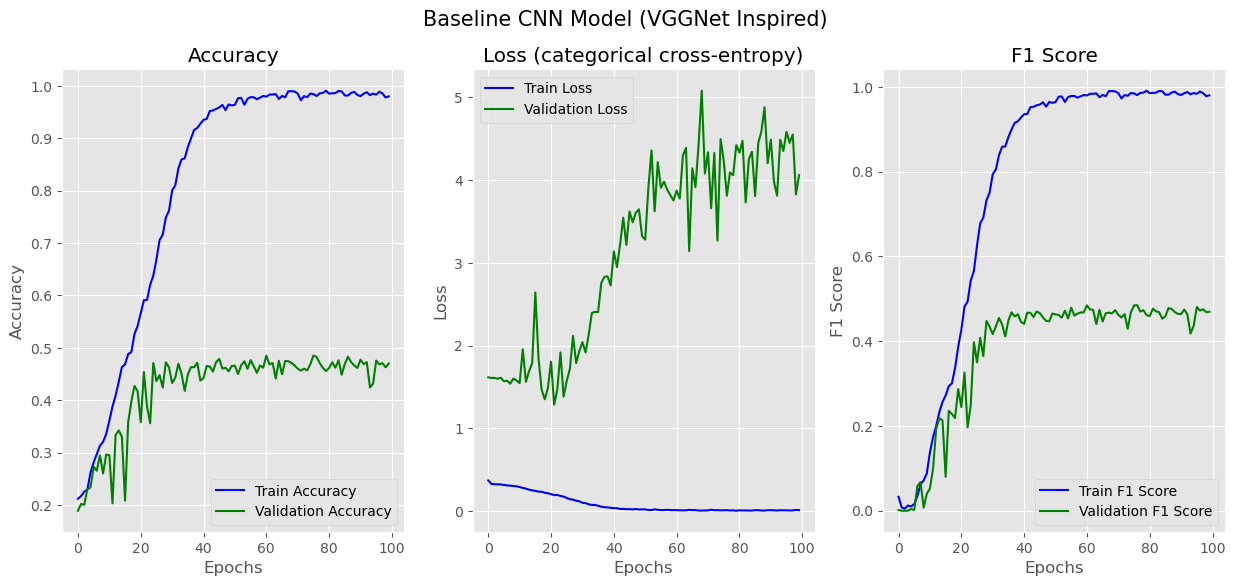

In [23]:
# Collect training and validation metric data from the model training
b_acc        = baseline_CNN_fit.history['accuracy']    
b_val_acc    = baseline_CNN_fit.history['val_accuracy']
b_loss       = baseline_CNN_fit.history['loss']
b_val_loss   = baseline_CNN_fit.history['val_loss']
b_f1         = baseline_CNN_fit.history['f1_score']
b_val_f1     = baseline_CNN_fit.history['val_f1_score']
b_num_epochs = range(len(b_acc))

# Plot the Training and Test accuracy over all the epochs
b_fig, b_ax = plt.subplots(1, 3, figsize = (15, 6))
b_fig.suptitle('Baseline CNN Model (VGGNet Inspired)', c = 'k', fontsize = '15')

b_ax[0].plot(b_acc, 'b-', label = 'Train Accuracy')
b_ax[0].plot(b_val_acc, 'g-', label = 'Validation Accuracy')
b_ax[0].set_title('Accuracy')
b_ax[0].legend()
b_ax[0].set_xlabel('Epochs')
b_ax[0].set_ylabel('Accuracy')
b_ax[0].spines['right'].set_visible(False)
b_ax[0].spines['top'].set_visible(False)

b_ax[1].plot(b_loss, 'b-', label = 'Train Loss')
b_ax[1].plot(b_val_loss, 'g-', label = 'Validation Loss')
b_ax[1].set_title('Loss (categorical cross-entropy)')     
b_ax[1].legend()
b_ax[1].set_xlabel('Epochs')                                            
b_ax[1].set_ylabel('Loss')
b_ax[1].spines['right'].set_visible(False)
b_ax[1].spines['top'].set_visible(False)

b_ax[2].plot(b_f1, 'b-', label = 'Train F1 Score')
b_ax[2].plot(b_val_f1, 'g-', label = 'Validation F1 Score')
b_ax[2].set_title('F1 Score')     
b_ax[2].legend()
b_ax[2].set_xlabel('Epochs')                                            
b_ax[2].set_ylabel('F1 Score')
b_ax[2].spines['right'].set_visible(False)
b_ax[2].spines['top'].set_visible(False)

plt.show()
b_fig.savefig('Baseline_Model_plot.jpg')

#### CNN Model Parameters<a id='step6.b'></a>
The modeling process was iterative and thorough to identify the optimal combination of batch sizes, top layer fully connected channels, dropout rates, and fine-tuning layer training. I followed the below process to find the best top fully connected layer, resulting in over $220$ models. Model selection was based on a composite (normalized) scoring of validation accuracy, loss, and $F1$ score.

1. Test various combinations of top fully connected layer channels ($32-4096$), of batch size $16$ ($103$ total models)
2. Test the top $10$ models of batch size 16 models tested to batch sizes $16$, $32$, $64$, $128$ ($40$ total models)
3. Test the top $10$ models of all batch size models tested, with dropouts of $0.2$, $0.4$, $0.6$, $0.8$ ($40$ total models)
4. Test the top $4$ models of all dropout models with fine-tuning at eight different unfrozen layers ($42$ total models)
5. Test the top $3$ models with progressively increasing dropouts from $0.4$ to $0.8$.
6. Final model selection based on the top fully connected layer:
    - $1^{st}$ fully connected layer 
        - $256$ channels with `Leaky ReLU` activation
        - $0.4$ dropout layer
    - $2^{nd}$ fully connected layer 
        - $512$ channels with `Leaky ReLU` activation
        - $0.6$ dropout layer
    - $3^{rd}$ fully connected layer 
        - $1024$ channels with `Leaky ReLU` activation
        - $0.8$ dropout layer

#### The Final Model:
- Batch size $128$ provided a good balance of model training convergence and performance improvement, balanced with available computer resources ([Krohn, 2020, p.119](#ref8)).

- A maximum of $500$ epochs was arbitrarily selected as epoch limit for model training.

- Convolutional Parameters and Metrics
    - Kernel size of three is a common and well-established parameter for learning patterns within the image in $3$x$3$ pixel windows ([Krohn, 2020, p.168](#ref8)).
    - Pool size of $2$x$2$ provided to help reduce the dimensions of each input to hidden layers by a factor of two, minimizing the number of parameters required in computation ([Krohn, 2020, p.169](#ref8)).
    - Activation Layer of Leaky Rectified Linear Unit (`Leaky ReLU`) is an adjustment from the regular `ReLU` by returning a small negative value for a negative input instead of a zero. This approach helps neurons in each hidden layer to contribute to learning and extracting unique features from images by preventing the zero gradient traditionally observed in `ReLU` ([Krohn, 2020, p.94](#ref8)).
        - $Leaky \ ReLU \ (x) = \begin{cases} 0.2x & x < 0 \\ x & x \ge 0\end{cases}$
    - Loss (cost) function of categorical cross-entropy evaluates the dissimilarity between the predicted distribution and actual probability distribution of the classes. High probabilities for the correct class and low probabilities for the incorrect class is rewarded ([Krohn, 2020, p.113](#ref8)).
        - $Loss = -\sum_{i} y_{\text{true}, i} \log(y_{\text{pred}, i})$
    - Optimization algorithm of Adaptive Moment Estimation (`Adam`) provides adaptive learning rates that help fast convergence using the concept of momentum, bias correction, and improved memory use by not storing the full gradient record but instead referencing decaying average of prior gradients ([Krohn, 2020, p.147](#ref8)).
        - I found reducing the learning rate by a tenth provided improved fine-tuning performance.
    - Metric of accuracy is used for interpretability and comparison against other models. While the loss metric is the most valued during training, and accuracy is universally best understood, I also looked at the F1 Score as the harmonic mean of precision (portion of true positives out all positives) and recall (portion of true positives out actual positives) as another metric what mitigates for class imbalance.
  
  
- Overfitting Controls and Gradient Stabilization
    - Image Augmentation was added at the beginning of the model to augment in the training dataset size and for regularization ([Krohn, 2020, p.145](#ref8)).
    - Dropout layers were added to the fully connected layer of $0.2$, $0.6$, and $0.8$ ([Krohn, 2020, p.142](#ref8)).
    - Batch Normalization was added after the top max pooling layer for regularization following `EfficientNet 2VS` training ([Krohn, 2020, p.138](#ref8)).


- Output Parameter
    - Output Activation layer of `Softmax` is designed for multi-classification model. The output is a vector that sums to $1$, and each element lies between $0$ and $1$, indicating the probability distribution of image's most likely label classification ([Krohn, 2020, p.106](#ref8)).

[Return to the Project Outline](#outline)

In [24]:
# Layer paramters
kernel_size = 3
layer_act   = tf.keras.layers.LeakyReLU(alpha = 0.2, name = 'leaky_relu')
out_act     = 'softmax'
pool_size   = (2, 2)
FC_drop_1   = 0.4
FC_drop_2   = 0.8

# Modeling parameters
LR_param    = 0.001 
opt_tl      = tf.keras.optimizers.Adam(learning_rate = 0.001, name = 'adam_tl')
opt_ft      = tf.keras.optimizers.Adam(learning_rate = 0.00001, name = 'adam_ft')
loss_func   = tf.keras.losses.CategoricalCrossentropy(name = 'categorical_cross-entropy')

metric      = ['accuracy',
               tf.keras.metrics.F1Score(average = 'macro', threshold = 0.5, name = 'f1_score')]
epochs      = 500
#work_param  = multiprocessing.cpu_count()

#### CNN Callback Features<a id='step6.c'></a>
- The "reduce learning rate" callback provides improved model performance by reducing the learning rate by a certain factor after a certain number of epochs with no categorical cross-entropy (`loss` function) reduction, known as "patience" ([Chollet, 2021, p.188](#ref2)).
    - I applied a separate callback for the transfer learning training and the fine-tuning training, to enable fine-tuning by more sensitive learning rate adjustments (the learning rate reduction factor was lowered from $0.5$ to $0.2$, and the patience requirement was raised).

- The "model checkpoint" saves the best model weights for future use ([Chollet, 2021, p.188)](#ref2)).

- The "early stop monitor" prevents the model from needlessly training to the $500^{th}$ epoch if no performance improvement (categorical cross-entropy loss function) is observed after six epochs (i.e. the categorical cross-entropy metric plateaus or indicates an increasing trend) ([Chollet, 2021, p.188](#ref2)).

[Return to the Project Outline](#outline)

In [25]:
# Callback to reduce the RMSProp optimizing learning rate when the loss metric stops improving
call_LR = ReduceLROnPlateau(monitor = 'val_loss',
                            patience = 2,
                            verbose  = 1, 
                            factor   = 0.5,
                            min_lr   = 0.001)

call_LR_FT = ReduceLROnPlateau(monitor = 'val_loss',
                            patience = 3,
                            verbose  = 1, 
                            factor   = 0.2,
                            min_lr   = 0.00001)

# Callback to save the best metrics (validation accuracy)
call_save = ModelCheckpoint('C:/Users/dougr/Rogi_Emotions_CNN',
                            monitor = 'val_accuracy',
                            mode           = 'max',
                            verbose        = 1,
                            save_best_only = True)

# Callback to stop training after 6 epochs of validation loss (categorical cross-entropy) degredation
call_stop = EarlyStopping(monitor  = 'val_loss', 
                          mode     = 'min', 
                          verbose  = 1,
                          patience = 8)

#### CNN Transfer Learning Model Set-up<a id='step6.d'></a>
- The `TensorFlow AUTOTUNE` function is applied to the training and validation sets, enabling `TensorFlow` to efficiently utilize system resources, such as the CPU and GPU, by prefetching and caching data in memory, resulting in optimal model runtime and faster training times ([Better Performance with the TensorFlow.data API](https://www.tensorflow.org/guide/data_performance#overview)).

</break>

- **`EfficientNetV2S` Layer** is instantiated for transfer learning ([TensorFlow EfficientNetV2S API](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetV2S), [Chollet, 2021, p.227-231](#ref2)):
    - `include_top` is set to `False`. This project's model has a specified five-class output requirement, and I intend to train a custom top fully connected dense layer.
    - `weight` set to include the pretrained `ImageNet` weights to train on the five-class dog emotions dataset.
    - `input shape` parameter is required since `include_top` was set to `False`.
    - `include_preprocessing` parameter is defaulted to `True` to leverage the `EfficientNetV2S` normalization and consistency between the pretrained model and the five-class dog emotion dataset.
    - `trainable` set to False "freezes" the `EfficientNetV2S` weights so that during transfer learning, the model runs in inference mode only, learning by using the pre-trained weights of `EfficientNetV2S` ([Chollet, 2024](#ref3)).
    
</break>

- The transfer learning CNN model consists of the following layers:
    - **Input Layer** of $128$ x $128$ x $3$
    - **Image Augmentation Layer** to make the training data more robust and generalizable to mitigate for overfitting ([Chollet, 2021, p.221](#ref2)):
        - *Random Flipping*
        - *Random Rotation* of images by a factor of $0.25$
        - *Random Translation* of the images by a factor of $0.1$ vertically and horizontally
        - *Random Contrast* of images by a factor of $0.25$
    - **Top Average Pooling Layer** to help the model's training efficient by reducing the number of parameters and dimension size of the EfficientNetV2S output for computational efficiency. 
        - Average Pooling extracts the average features of each input patch and is less sensitive to noise or large variance ([TensorFlow API AveragePooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)). 
        - Max Pooling extracts the most prominent feature of each grouping of pixels emphasizing the most important features while discarding more subtle information ([TensorFlow API MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D)).
        - Max Pooling showed a slight improvement over Average Pooling on the base model without any top dense layers.
    - **Flatten Layer** is necessary to collapse the high dimensional arrays to a single dimension prior to the custom top dense layer and output layer, both of which require a one-dimension array ([Chollet, 2021, p. 229](#ref2), [Krohn, 2020, p.171, 173](#ref8)).
    - **Top Dense Layer** is a fully connected one-dimensional set of layers to receive the multi-dimensional arrays from the `EfficentNetV2S` transfer learning training for recombination into an interpretable structure for class probability distribution. This set of fully connected layers apply the `Leaky ReLU` activation layer to continue the learning process with new fully connected layer weights ([Krohn, 2020, p.173](#ref8)).
        - I began with a single 16-channel dense layer (no drop-out) and iteratively added additional layers with varying combination of parameters until performance degraded.
    - **Output Dense Layer** receives the top dense layer neurons and applies the `Softmax` algorithm for multi-classification probability distribution (i.e., $[0.2$, $0.6$, $0.03$, $0.1$, $0.07]$).

[Return to the Project Outline](#outline)

[Go to the Project Summary and Metrics History Review](#step10)

In [26]:
# Autotune dynamically to prefetch (read) data in parallel while training
AUTOTUNE = tf.data.AUTOTUNE

# Cache the data in memory for effificent training across epochs
ds_train = ds_train.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
ds_val = ds_val.cache().prefetch(buffer_size = AUTOTUNE)

In [27]:
# EfficientNet V2-S transfer leanring
tl_model = EfficientNetV2S(include_top = False,
                           weights = 'imagenet',
                           input_shape = (img_size, img_size, 3),
                          )
# Freeze the base_model
tl_model.trainable = False

In [28]:
# EfficientNet V2-S transfer leanring
tl_model = EfficientNetV2S(include_top = False,
                           weights = 'imagenet',
                           input_shape = (img_size, img_size, 3),)

# Freeze the base_model
tl_model.trainable = False

# Image Augmentation Layer
img_aug_layer = Sequential([
    RandomFlip('horizontal_and_vertical'),
    RandomRotation(factor = 0.25),
    RandomTranslation(height_factor = 0.1, width_factor = 0.1),
    RandomContrast(factor = 0.25),],
    name = 'Image_Augmentation')

# Top Conv2D Layer
top_CNN_Layer = Sequential([
    Conv2D(filters = 32, 
           kernel_size = kernel_size, 
           activation = 'relu',)],
    name = 'Top_CNN_Layer')

# Top layer Pooling addition - MaxPool2D|AveragePooling2D. 
# MaxPool2D did a bit better on baseline TL model with no top dense layers
top_pooling_layer = Sequential([
    MaxPool2D(pool_size = pool_size, strides = pool_size, padding = 'valid'),
    BatchNormalization(),],
    name = 'Top_Pooling_Layer')

flatten_layer = Sequential([
    Flatten(),],
    name = 'Flatten_Layer')

# Top fully connected dense layer (start node at the bottom, end node at the top)
top_FC_layer = Sequential([
      
    Dense(units = 256, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop_2),
    Dense(units = 512, activation = layer_act),
    BatchNormalization(),
    Dropout(.6),
    Dense(units = 1024, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop_1),
],
    name = 'Top_Dense_Layers')

# Combined model with a specified name
model1 = Sequential(name = 'Transfer_Learning_Image_Classification')

# Add layers to the model
model1.add(Input((img_size, img_size, 3)))
model1.add(img_aug_layer)
model1.add(tl_model)
#model1.add(top_CNN_Layer)
#model1.add(top_pooling_layer)
model1.add(flatten_layer)
model1.add(top_FC_layer)
model1.add(Dense(units = len(class_names),
                 activation = out_act,
                 dtype = 'float32',
                 name = 'Multi-Class_Output'))

# Summarize the model
model1.summary(line_length = 100, show_trainable = True)

Model: "Transfer_Learning_Image_Classification"
_______________________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        Trainable  
 Image_Augmentation (Sequential)             (None, 128, 128, 3)                     0              Y          
                                                                                                               
 efficientnetv2-s (Functional)               (None, 4, 4, 1280)                      20331360       N          
                                                                                                               
 Flatten_Layer (Sequential)                  (None, 20480)                           0              Y          
                                                                                                               
 Top_Dense_Layers (Sequential)               (None, 1024

#### Train the CNN Transfer Learning Model<a id='step6.e'></a>

- Compile the Model
    - **Optimizer** of choice is the adaptive moment estimate (`Adam`) algorithm, due to its effective and efficient extension of the root mean squared propagation (`RMSProp`) algorithm, as previously discussed in the [CNN Model Parameter](#step6.a) section.
    - **Loss** (or cost) parameter to minimize is `categorical cross-entropy`, as discussed [CNN Model Parameter](#step6.a) section. The `callback` feature for learning rate reduction and early stopping references the loss metric.
    - **Metrics** parameters to observe are `accuracy` and `F1 Score`.
    
</break>

- Fit the Model
    - **Class Weights** are applied, as discussed in the [Review the Class Distribution](#step5.1) section.
    - **Epochs** were set at a max of $500$, however with the callback feature this limit was never actually reached.
    - **Verbose** is set to $1$ to review model performance real-time.
    - **Validation** of the model is done with the validation data set ($25\%$ of the full dataset).
    - **Callback** feature is set for learning rate reduction at the rate of .001 for the optimizer algorithm (`Adam`), and early stopping references degrading loss parameter performance at a patience level of six `epochs`. Further discussed in the [CNN Model Callback](#step6.b) section.
    - **Model Runtime** is recorded, as part of the model performance evaluation against the time required to train the model.

[Return to the Project Outline](#outline)

In [29]:
# Compile the model minimzing categorical cross-entropy with Adam optimization, while monitoring accuracy and F1 Score
model1.compile(
    optimizer = opt_tl,
    loss = loss_func,
    metrics = metric)

In [30]:
# Start the model runtime
tl_start_time = datetime.datetime.now()

# Train the CNN model up to 500 max epochs and an early stop callback
fit_history1 = model1.fit(ds_train,
                          class_weight = class_weight,
                          epochs = epochs,
                          verbose = 0,
                          validation_data = ds_val,
                          callbacks = [call_LR, call_stop])
# Stop the model runtime
tl_stop_time = datetime.datetime.now()

Epoch 52: early stopping


In [31]:
# Print the transfer Learning model runtime and metrics
tl_time = tl_stop_time - tl_start_time
print ('Transfer learning model training time: ', bl_time, 
       '\n\nTransfer learning model Accuracy =  ', round(max(fit_history1.history['val_accuracy']), 5),
       '\nTransfer learning model Loss = ', round(min(fit_history1.history['val_loss']), 5),
       sep = '')

Baseline model training time: 0:08:15.759296

Baseline model Accuracy =  0.52853
Baseline model Loss = 1.12715


#### CNN Transfer Learning Model Performance Analysis<a id='step6.f'></a>
The initial modeling training with transfer learning using a batch size of 16 (no top dense layers, batch normalization, or dropout) resulted in a validation accuracy of $45\%$ and a minimum categorical cross-entropy of $1.2$ after $15$ epochs. 

The early stopping callback criteria were met, as indicated by the loss metric leveling off (plateau), and model convergence with no overfitting. This indicated to me the obvious fact the model is overly simple and biased, with plenty of opportunity to add layer complexity.

Moving forward, model training continued with incremental complexity added (top dense layers, max pooling layer and average pooling layer comparison), as well as incremental control for variance (increase in batch size, batch normalization, dropout. As model complexity increased with variance control, there was a steady increase in transfer learning performance.

My transfer learning training benchmark achieved at least a $50\%$ accuracy prior to early stoppage and fine-tuning.

[Return to the Project Outline](#outline)

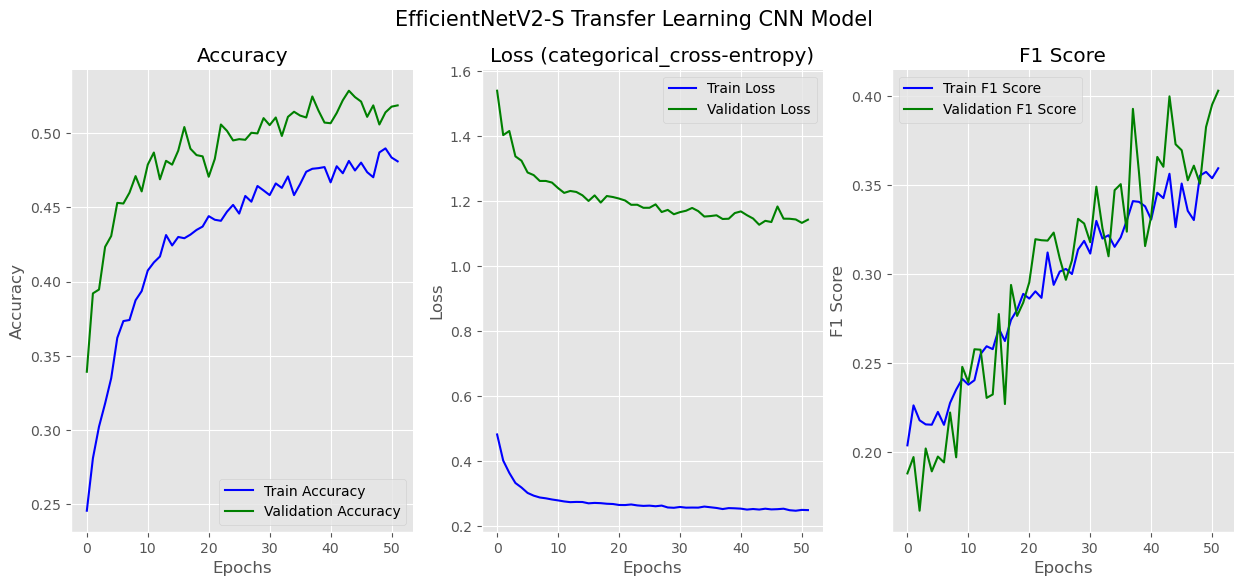

In [32]:
# Collect training and validation metric data from the model training
acc        = fit_history1.history['accuracy']    
val_acc    = fit_history1.history['val_accuracy']
loss       = fit_history1.history['loss']
val_loss   = fit_history1.history['val_loss']
f1         = fit_history1.history['f1_score']
val_f1     = fit_history1.history['val_f1_score']
num_epochs = range(len(acc))

# Plot the Training and Test accuracy over all the epochs
fig1, ax1 = plt.subplots(1, 3, figsize = (15, 6))
fig1.suptitle('EfficientNetV2-S Transfer Learning CNN Model', c = 'k', fontsize = '15')

ax1[0].plot(acc, 'b-', label = 'Train Accuracy')
ax1[0].plot(val_acc, 'g-', label = 'Validation Accuracy')
ax1[0].set_title('Accuracy')
ax1[0].legend()
ax1[0].set_xlabel('Epochs')
ax1[0].set_ylabel('Accuracy')
ax1[0].spines['right'].set_visible(False)
ax1[0].spines['top'].set_visible(False)

ax1[1].plot(loss, 'b-', label = 'Train Loss')
ax1[1].plot(val_loss, 'g-', label = 'Validation Loss')
ax1[1].set_title('Loss (' + loss_func.name + ')')     
ax1[1].legend()
ax1[1].set_xlabel('Epochs')                                            
ax1[1].set_ylabel('Loss')
ax1[1].spines['right'].set_visible(False)
ax1[1].spines['top'].set_visible(False)

ax1[2].plot(f1, 'b-', label = 'Train F1 Score')
ax1[2].plot(val_f1, 'g-', label = 'Validation F1 Score')
ax1[2].set_title('F1 Score')     
ax1[2].legend()
ax1[2].set_xlabel('Epochs')                                            
ax1[2].set_ylabel('F1 Score')
ax1[2].spines['right'].set_visible(False)
ax1[2].spines['top'].set_visible(False)

plt.show()
fig1.savefig('Model_plot_tl.jpg')

In [33]:
# Show Model validation metric output
tl_val_loss, tl_val_acc, tl_val_f1 = model1.evaluate(ds_val)

19/19 [==============================] - 2s 104ms/step - loss: 1.1427 - accuracy: 0.5187 - f1_score: 0.4032


## CNN Fine-Tuning Model Design<a id='step7'></a>

Initially, the fine-tuning stage was done in inference mode (the EfficientNetV2S weights were left untouched), while I evaluated the transfer learning model performance. Once a certain level of improvement was achieved, relative to runtime and rate of improvement, the model evaluation transitioned to fine-tuning modeling. 

While evaluating the fine-tuning model performance, the priority was to determine if there was an optimal number of `EfficientNetV2S` layers to unfreeze for training (change the model's hidden layer weights), without impacting the `EfficentNetV2` batch normalization layer's statistics ([Chollet, 2024)](#ref3)).

[Return to the Project Outline](#outline)

#### CNN Fine-Tuning Model Set-up<a id='step7.a'></a>

- The decision to do fine-tune in inference mode, or to unfreeze the `EfficientNetV2S` weights is decided once the transfer learning model is satisfactory (targeting $> 50\% \ accuracy$ and $< 1.0 \ loss$).
- `EfficientNetV2S` batch normalization layers always remained in inference mode for modeling stability ([Chollet, 2024](#ref3)).

[Return to the Project Outline](#outline)

In [34]:
# Un-freeze the top layers of the model
#tl_model.trainable = True
print('Number of layers in the base model: ', len(tl_model.layers))
print('Number of layers in the final model: ', len(model1.layers))

Number of layers in the base model:  513
Number of layers in the final model:  5


In [35]:
# Pick a layer to begin unfrozen training
tl_model.summary(line_length = 100, show_trainable = True)

Model: "efficientnetv2-s"
_______________________________________________________________________________________________________________
 Layer (type)                 Output Shape                  Param #   Connected to                  Trainable  
 input_3 (InputLayer)         [(None, 128, 128, 3)]         0         []                            N          
                                                                                                               
 rescaling_1 (Rescaling)      (None, 128, 128, 3)           0         ['input_3[0][0]']             N          
                                                                                                               
 stem_conv (Conv2D)           (None, 64, 64, 24)            648       ['rescaling_1[0][0]']         N          
                                                                                                               
 stem_bn (BatchNormalization  (None, 64, 64, 24)            96        ['stem_c

 block2b_drop (Dropout)       (None, 32, 32, 48)            0         ['block2b_project_bn[0][0]'   N          
                                                                      ]                                        
                                                                                                               
 block2b_add (Add)            (None, 32, 32, 48)            0         ['block2b_drop[0][0]',        N          
                                                                       'block2a_project_bn[0][0]'              
                                                                      ]                                        
                                                                                                               
 block2c_expand_conv (Conv2D  (None, 32, 32, 192)           82944     ['block2b_add[0][0]']         N          
 )                                                                                                      

 D)                                                                   [0][0]']                                 
                                                                                                               
 block3b_project_bn (BatchNo  (None, 16, 16, 64)            256       ['block3b_project_conv[0][0   N          
 rmalization)                                                         ]']                                      
                                                                                                               
 block3b_drop (Dropout)       (None, 16, 16, 64)            0         ['block3b_project_bn[0][0]'   N          
                                                                      ]                                        
                                                                                                               
 block3b_add (Add)            (None, 16, 16, 64)            0         ['block3b_drop[0][0]',        N   

                                                                                                               
 block4a_se_reshape (Reshape  (None, 1, 1, 256)             0         ['block4a_se_squeeze[0][0]'   N          
 )                                                                    ]                                        
                                                                                                               
 block4a_se_reduce (Conv2D)   (None, 1, 1, 16)              4112      ['block4a_se_reshape[0][0]'   N          
                                                                      ]                                        
                                                                                                               
 block4a_se_expand (Conv2D)   (None, 1, 1, 256)             4352      ['block4a_se_reduce[0][0]']   N          
                                                                                                        

 block4c_dwconv2 (DepthwiseC  (None, 8, 8, 512)             4608      ['block4c_expand_activation   N          
 onv2D)                                                               [0][0]']                                 
                                                                                                               
 block4c_bn (BatchNormalizat  (None, 8, 8, 512)             2048      ['block4c_dwconv2[0][0]']     N          
 ion)                                                                                                          
                                                                                                               
 block4c_activation (Activat  (None, 8, 8, 512)             0         ['block4c_bn[0][0]']          N          
 ion)                                                                                                          
                                                                                                        

                                                                                                               
 block4d_drop (Dropout)       (None, 8, 8, 128)             0         ['block4d_project_bn[0][0]'   N          
                                                                      ]                                        
                                                                                                               
 block4d_add (Add)            (None, 8, 8, 128)             0         ['block4d_drop[0][0]',        N          
                                                                       'block4c_add[0][0]']                    
                                                                                                               
 block4e_expand_conv (Conv2D  (None, 8, 8, 512)             65536     ['block4d_add[0][0]']         N          
 )                                                                                                      

 )                                                                    ]                                        
                                                                                                               
 block4f_se_reduce (Conv2D)   (None, 1, 1, 32)              16416     ['block4f_se_reshape[0][0]'   N          
                                                                      ]                                        
                                                                                                               
 block4f_se_expand (Conv2D)   (None, 1, 1, 512)             16896     ['block4f_se_reduce[0][0]']   N          
                                                                                                               
 block4f_se_excite (Multiply  (None, 8, 8, 512)             0         ['block4f_activation[0][0]'   N          
 )                                                                    , 'block4f_se_expand[0][0]'       

 block5b_bn (BatchNormalizat  (None, 8, 8, 960)             3840      ['block5b_dwconv2[0][0]']     N          
 ion)                                                                                                          
                                                                                                               
 block5b_activation (Activat  (None, 8, 8, 960)             0         ['block5b_bn[0][0]']          N          
 ion)                                                                                                          
                                                                                                               
 block5b_se_squeeze (GlobalA  (None, 960)                   0         ['block5b_activation[0][0]'   N          
 veragePooling2D)                                                     ]                                        
                                                                                                        

                                                                      ]                                        
                                                                                                               
 block5c_add (Add)            (None, 8, 8, 160)             0         ['block5c_drop[0][0]',        N          
                                                                       'block5b_add[0][0]']                    
                                                                                                               
 block5d_expand_conv (Conv2D  (None, 8, 8, 960)             153600    ['block5c_add[0][0]']         N          
 )                                                                                                             
                                                                                                               
 block5d_expand_bn (BatchNor  (None, 8, 8, 960)             3840      ['block5d_expand_conv[0][0]   N   

 block5e_se_reduce (Conv2D)   (None, 1, 1, 40)              38440     ['block5e_se_reshape[0][0]'   N          
                                                                      ]                                        
                                                                                                               
 block5e_se_expand (Conv2D)   (None, 1, 1, 960)             39360     ['block5e_se_reduce[0][0]']   N          
                                                                                                               
 block5e_se_excite (Multiply  (None, 8, 8, 960)             0         ['block5e_activation[0][0]'   N          
 )                                                                    , 'block5e_se_expand[0][0]'              
                                                                      ]                                        
                                                                                                        

                                                                                                               
 block5g_dwconv2 (DepthwiseC  (None, 8, 8, 960)             8640      ['block5g_expand_activation   N          
 onv2D)                                                               [0][0]']                                 
                                                                                                               
 block5g_bn (BatchNormalizat  (None, 8, 8, 960)             3840      ['block5g_dwconv2[0][0]']     N          
 ion)                                                                                                          
                                                                                                               
 block5g_activation (Activat  (None, 8, 8, 960)             0         ['block5g_bn[0][0]']          N          
 ion)                                                                                                   

 rmalization)                                                         ]']                                      
                                                                                                               
 block5h_drop (Dropout)       (None, 8, 8, 160)             0         ['block5h_project_bn[0][0]'   N          
                                                                      ]                                        
                                                                                                               
 block5h_add (Add)            (None, 8, 8, 160)             0         ['block5h_drop[0][0]',        N          
                                                                       'block5g_add[0][0]']                    
                                                                                                               
 block5i_expand_conv (Conv2D  (None, 8, 8, 960)             153600    ['block5h_add[0][0]']         N   

 block6a_se_reshape (Reshape  (None, 1, 1, 960)             0         ['block6a_se_squeeze[0][0]'   N          
 )                                                                    ]                                        
                                                                                                               
 block6a_se_reduce (Conv2D)   (None, 1, 1, 40)              38440     ['block6a_se_reshape[0][0]'   N          
                                                                      ]                                        
                                                                                                               
 block6a_se_expand (Conv2D)   (None, 1, 1, 960)             39360     ['block6a_se_reduce[0][0]']   N          
                                                                                                               
 block6a_se_excite (Multiply  (None, 4, 4, 960)             0         ['block6a_activation[0][0]'   N   

 onv2D)                                                               [0][0]']                                 
                                                                                                               
 block6c_bn (BatchNormalizat  (None, 4, 4, 1536)            6144      ['block6c_dwconv2[0][0]']     N          
 ion)                                                                                                          
                                                                                                               
 block6c_activation (Activat  (None, 4, 4, 1536)            0         ['block6c_bn[0][0]']          N          
 ion)                                                                                                          
                                                                                                               
 block6c_se_squeeze (GlobalA  (None, 1536)                  0         ['block6c_activation[0][0]'   N   

 block6d_drop (Dropout)       (None, 4, 4, 256)             0         ['block6d_project_bn[0][0]'   N          
                                                                      ]                                        
                                                                                                               
 block6d_add (Add)            (None, 4, 4, 256)             0         ['block6d_drop[0][0]',        N          
                                                                       'block6c_add[0][0]']                    
                                                                                                               
 block6e_expand_conv (Conv2D  (None, 4, 4, 1536)            393216    ['block6d_add[0][0]']         N          
 )                                                                                                             
                                                                                                        

                                                                                                               
 block6f_se_reduce (Conv2D)   (None, 1, 1, 64)              98368     ['block6f_se_reshape[0][0]'   N          
                                                                      ]                                        
                                                                                                               
 block6f_se_expand (Conv2D)   (None, 1, 1, 1536)            99840     ['block6f_se_reduce[0][0]']   N          
                                                                                                               
 block6f_se_excite (Multiply  (None, 4, 4, 1536)            0         ['block6f_activation[0][0]'   N          
 )                                                                    , 'block6f_se_expand[0][0]'              
                                                                      ]                                 

 Activation)                                                                                                   
                                                                                                               
 block6h_dwconv2 (DepthwiseC  (None, 4, 4, 1536)            13824     ['block6h_expand_activation   N          
 onv2D)                                                               [0][0]']                                 
                                                                                                               
 block6h_bn (BatchNormalizat  (None, 4, 4, 1536)            6144      ['block6h_dwconv2[0][0]']     N          
 ion)                                                                                                          
                                                                                                               
 block6h_activation (Activat  (None, 4, 4, 1536)            0         ['block6h_bn[0][0]']          N   

 block6i_project_bn (BatchNo  (None, 4, 4, 256)             1024      ['block6i_project_conv[0][0   N          
 rmalization)                                                         ]']                                      
                                                                                                               
 block6i_drop (Dropout)       (None, 4, 4, 256)             0         ['block6i_project_bn[0][0]'   N          
                                                                      ]                                        
                                                                                                               
 block6i_add (Add)            (None, 4, 4, 256)             0         ['block6i_drop[0][0]',        N          
                                                                       'block6h_add[0][0]']                    
                                                                                                        

                                                                                                               
 block6k_se_reshape (Reshape  (None, 1, 1, 1536)            0         ['block6k_se_squeeze[0][0]'   N          
 )                                                                    ]                                        
                                                                                                               
 block6k_se_reduce (Conv2D)   (None, 1, 1, 64)              98368     ['block6k_se_reshape[0][0]'   N          
                                                                      ]                                        
                                                                                                               
 block6k_se_expand (Conv2D)   (None, 1, 1, 1536)            99840     ['block6k_se_reduce[0][0]']   N          
                                                                                                        

 malization)                                                          ']                                       
                                                                                                               
 block6m_expand_activation (  (None, 4, 4, 1536)            0         ['block6m_expand_bn[0][0]']   N          
 Activation)                                                                                                   
                                                                                                               
 block6m_dwconv2 (DepthwiseC  (None, 4, 4, 1536)            13824     ['block6m_expand_activation   N          
 onv2D)                                                               [0][0]']                                 
                                                                                                               
 block6m_bn (BatchNormalizat  (None, 4, 4, 1536)            6144      ['block6m_dwconv2[0][0]']     N   

 block6n_project_conv (Conv2  (None, 4, 4, 256)             393216    ['block6n_se_excite[0][0]']   N          
 D)                                                                                                            
                                                                                                               
 block6n_project_bn (BatchNo  (None, 4, 4, 256)             1024      ['block6n_project_conv[0][0   N          
 rmalization)                                                         ]']                                      
                                                                                                               
 block6n_drop (Dropout)       (None, 4, 4, 256)             0         ['block6n_project_bn[0][0]'   N          
                                                                      ]                                        
                                                                                                        

In [36]:
# Set-up the fine-tuning for interfence, or to train on the ImageNet weights on layers - "yes", "no", "partial"
ft_inference = 'no'
layer = 'block2a_expand_conv'

if ft_inference == 'yes':
    fine_tune_layer = None
    tl_model.trainable = False

elif ft_inference == 'no':
    fine_tune_layer = 'Full' 
    tl_model.trainable = True
    
    # Set batch normalization layers to inference mode
    for layer in tl_model.layers:
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = False
            layer.momentum = 0.99

elif ft_inference == 'partial':
    fine_tune_layer = tl_model.layers.index(tl_model.get_layer(layer))
    
    #Freeze all the layers before the 'fine_tune_layer' layer
    for layer in tl_model.layers[ : fine_tune_layer]:
        layer.trainable = False
        # Set batch normalization layers to inference mode
    
    for layer in tl_model.layers:
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = False
            layer.momentum = 0.99

In [37]:
tl_model.summary(line_length = 100, show_trainable = True)

Model: "efficientnetv2-s"
_______________________________________________________________________________________________________________
 Layer (type)                 Output Shape                  Param #   Connected to                  Trainable  
 input_3 (InputLayer)         [(None, 128, 128, 3)]         0         []                            Y          
                                                                                                               
 rescaling_1 (Rescaling)      (None, 128, 128, 3)           0         ['input_3[0][0]']             Y          
                                                                                                               
 stem_conv (Conv2D)           (None, 64, 64, 24)            648       ['rescaling_1[0][0]']         Y          
                                                                                                               
 stem_bn (BatchNormalization  (None, 64, 64, 24)            96        ['stem_c

 block2b_drop (Dropout)       (None, 32, 32, 48)            0         ['block2b_project_bn[0][0]'   Y          
                                                                      ]                                        
                                                                                                               
 block2b_add (Add)            (None, 32, 32, 48)            0         ['block2b_drop[0][0]',        Y          
                                                                       'block2a_project_bn[0][0]'              
                                                                      ]                                        
                                                                                                               
 block2c_expand_conv (Conv2D  (None, 32, 32, 192)           82944     ['block2b_add[0][0]']         Y          
 )                                                                                                      

 D)                                                                   [0][0]']                                 
                                                                                                               
 block3b_project_bn (BatchNo  (None, 16, 16, 64)            256       ['block3b_project_conv[0][0   N          
 rmalization)                                                         ]']                                      
                                                                                                               
 block3b_drop (Dropout)       (None, 16, 16, 64)            0         ['block3b_project_bn[0][0]'   Y          
                                                                      ]                                        
                                                                                                               
 block3b_add (Add)            (None, 16, 16, 64)            0         ['block3b_drop[0][0]',        Y   

                                                                                                               
 block4a_se_reshape (Reshape  (None, 1, 1, 256)             0         ['block4a_se_squeeze[0][0]'   Y          
 )                                                                    ]                                        
                                                                                                               
 block4a_se_reduce (Conv2D)   (None, 1, 1, 16)              4112      ['block4a_se_reshape[0][0]'   Y          
                                                                      ]                                        
                                                                                                               
 block4a_se_expand (Conv2D)   (None, 1, 1, 256)             4352      ['block4a_se_reduce[0][0]']   Y          
                                                                                                        

 block4c_dwconv2 (DepthwiseC  (None, 8, 8, 512)             4608      ['block4c_expand_activation   Y          
 onv2D)                                                               [0][0]']                                 
                                                                                                               
 block4c_bn (BatchNormalizat  (None, 8, 8, 512)             2048      ['block4c_dwconv2[0][0]']     N          
 ion)                                                                                                          
                                                                                                               
 block4c_activation (Activat  (None, 8, 8, 512)             0         ['block4c_bn[0][0]']          Y          
 ion)                                                                                                          
                                                                                                        

                                                                                                               
 block4d_drop (Dropout)       (None, 8, 8, 128)             0         ['block4d_project_bn[0][0]'   Y          
                                                                      ]                                        
                                                                                                               
 block4d_add (Add)            (None, 8, 8, 128)             0         ['block4d_drop[0][0]',        Y          
                                                                       'block4c_add[0][0]']                    
                                                                                                               
 block4e_expand_conv (Conv2D  (None, 8, 8, 512)             65536     ['block4d_add[0][0]']         Y          
 )                                                                                                      

 )                                                                    ]                                        
                                                                                                               
 block4f_se_reduce (Conv2D)   (None, 1, 1, 32)              16416     ['block4f_se_reshape[0][0]'   Y          
                                                                      ]                                        
                                                                                                               
 block4f_se_expand (Conv2D)   (None, 1, 1, 512)             16896     ['block4f_se_reduce[0][0]']   Y          
                                                                                                               
 block4f_se_excite (Multiply  (None, 8, 8, 512)             0         ['block4f_activation[0][0]'   Y          
 )                                                                    , 'block4f_se_expand[0][0]'       

 block5b_bn (BatchNormalizat  (None, 8, 8, 960)             3840      ['block5b_dwconv2[0][0]']     N          
 ion)                                                                                                          
                                                                                                               
 block5b_activation (Activat  (None, 8, 8, 960)             0         ['block5b_bn[0][0]']          Y          
 ion)                                                                                                          
                                                                                                               
 block5b_se_squeeze (GlobalA  (None, 960)                   0         ['block5b_activation[0][0]'   Y          
 veragePooling2D)                                                     ]                                        
                                                                                                        

                                                                      ]                                        
                                                                                                               
 block5c_add (Add)            (None, 8, 8, 160)             0         ['block5c_drop[0][0]',        Y          
                                                                       'block5b_add[0][0]']                    
                                                                                                               
 block5d_expand_conv (Conv2D  (None, 8, 8, 960)             153600    ['block5c_add[0][0]']         Y          
 )                                                                                                             
                                                                                                               
 block5d_expand_bn (BatchNor  (None, 8, 8, 960)             3840      ['block5d_expand_conv[0][0]   N   

 block5e_se_reduce (Conv2D)   (None, 1, 1, 40)              38440     ['block5e_se_reshape[0][0]'   Y          
                                                                      ]                                        
                                                                                                               
 block5e_se_expand (Conv2D)   (None, 1, 1, 960)             39360     ['block5e_se_reduce[0][0]']   Y          
                                                                                                               
 block5e_se_excite (Multiply  (None, 8, 8, 960)             0         ['block5e_activation[0][0]'   Y          
 )                                                                    , 'block5e_se_expand[0][0]'              
                                                                      ]                                        
                                                                                                        

                                                                                                               
 block5g_dwconv2 (DepthwiseC  (None, 8, 8, 960)             8640      ['block5g_expand_activation   Y          
 onv2D)                                                               [0][0]']                                 
                                                                                                               
 block5g_bn (BatchNormalizat  (None, 8, 8, 960)             3840      ['block5g_dwconv2[0][0]']     N          
 ion)                                                                                                          
                                                                                                               
 block5g_activation (Activat  (None, 8, 8, 960)             0         ['block5g_bn[0][0]']          Y          
 ion)                                                                                                   

 rmalization)                                                         ]']                                      
                                                                                                               
 block5h_drop (Dropout)       (None, 8, 8, 160)             0         ['block5h_project_bn[0][0]'   Y          
                                                                      ]                                        
                                                                                                               
 block5h_add (Add)            (None, 8, 8, 160)             0         ['block5h_drop[0][0]',        Y          
                                                                       'block5g_add[0][0]']                    
                                                                                                               
 block5i_expand_conv (Conv2D  (None, 8, 8, 960)             153600    ['block5h_add[0][0]']         Y   

 block6a_se_reshape (Reshape  (None, 1, 1, 960)             0         ['block6a_se_squeeze[0][0]'   Y          
 )                                                                    ]                                        
                                                                                                               
 block6a_se_reduce (Conv2D)   (None, 1, 1, 40)              38440     ['block6a_se_reshape[0][0]'   Y          
                                                                      ]                                        
                                                                                                               
 block6a_se_expand (Conv2D)   (None, 1, 1, 960)             39360     ['block6a_se_reduce[0][0]']   Y          
                                                                                                               
 block6a_se_excite (Multiply  (None, 4, 4, 960)             0         ['block6a_activation[0][0]'   Y   

 onv2D)                                                               [0][0]']                                 
                                                                                                               
 block6c_bn (BatchNormalizat  (None, 4, 4, 1536)            6144      ['block6c_dwconv2[0][0]']     N          
 ion)                                                                                                          
                                                                                                               
 block6c_activation (Activat  (None, 4, 4, 1536)            0         ['block6c_bn[0][0]']          Y          
 ion)                                                                                                          
                                                                                                               
 block6c_se_squeeze (GlobalA  (None, 1536)                  0         ['block6c_activation[0][0]'   Y   

 block6d_drop (Dropout)       (None, 4, 4, 256)             0         ['block6d_project_bn[0][0]'   Y          
                                                                      ]                                        
                                                                                                               
 block6d_add (Add)            (None, 4, 4, 256)             0         ['block6d_drop[0][0]',        Y          
                                                                       'block6c_add[0][0]']                    
                                                                                                               
 block6e_expand_conv (Conv2D  (None, 4, 4, 1536)            393216    ['block6d_add[0][0]']         Y          
 )                                                                                                             
                                                                                                        

                                                                                                               
 block6f_se_reduce (Conv2D)   (None, 1, 1, 64)              98368     ['block6f_se_reshape[0][0]'   Y          
                                                                      ]                                        
                                                                                                               
 block6f_se_expand (Conv2D)   (None, 1, 1, 1536)            99840     ['block6f_se_reduce[0][0]']   Y          
                                                                                                               
 block6f_se_excite (Multiply  (None, 4, 4, 1536)            0         ['block6f_activation[0][0]'   Y          
 )                                                                    , 'block6f_se_expand[0][0]'              
                                                                      ]                                 

 Activation)                                                                                                   
                                                                                                               
 block6h_dwconv2 (DepthwiseC  (None, 4, 4, 1536)            13824     ['block6h_expand_activation   Y          
 onv2D)                                                               [0][0]']                                 
                                                                                                               
 block6h_bn (BatchNormalizat  (None, 4, 4, 1536)            6144      ['block6h_dwconv2[0][0]']     N          
 ion)                                                                                                          
                                                                                                               
 block6h_activation (Activat  (None, 4, 4, 1536)            0         ['block6h_bn[0][0]']          Y   

 block6i_project_bn (BatchNo  (None, 4, 4, 256)             1024      ['block6i_project_conv[0][0   N          
 rmalization)                                                         ]']                                      
                                                                                                               
 block6i_drop (Dropout)       (None, 4, 4, 256)             0         ['block6i_project_bn[0][0]'   Y          
                                                                      ]                                        
                                                                                                               
 block6i_add (Add)            (None, 4, 4, 256)             0         ['block6i_drop[0][0]',        Y          
                                                                       'block6h_add[0][0]']                    
                                                                                                        

                                                                                                               
 block6k_se_reshape (Reshape  (None, 1, 1, 1536)            0         ['block6k_se_squeeze[0][0]'   Y          
 )                                                                    ]                                        
                                                                                                               
 block6k_se_reduce (Conv2D)   (None, 1, 1, 64)              98368     ['block6k_se_reshape[0][0]'   Y          
                                                                      ]                                        
                                                                                                               
 block6k_se_expand (Conv2D)   (None, 1, 1, 1536)            99840     ['block6k_se_reduce[0][0]']   Y          
                                                                                                        

 malization)                                                          ']                                       
                                                                                                               
 block6m_expand_activation (  (None, 4, 4, 1536)            0         ['block6m_expand_bn[0][0]']   Y          
 Activation)                                                                                                   
                                                                                                               
 block6m_dwconv2 (DepthwiseC  (None, 4, 4, 1536)            13824     ['block6m_expand_activation   Y          
 onv2D)                                                               [0][0]']                                 
                                                                                                               
 block6m_bn (BatchNormalizat  (None, 4, 4, 1536)            6144      ['block6m_dwconv2[0][0]']     N   

 block6n_project_conv (Conv2  (None, 4, 4, 256)             393216    ['block6n_se_excite[0][0]']   Y          
 D)                                                                                                            
                                                                                                               
 block6n_project_bn (BatchNo  (None, 4, 4, 256)             1024      ['block6n_project_conv[0][0   N          
 rmalization)                                                         ]']                                      
                                                                                                               
 block6n_drop (Dropout)       (None, 4, 4, 256)             0         ['block6n_project_bn[0][0]'   Y          
                                                                      ]                                        
                                                                                                        

In [38]:
model1.summary(line_length = 100, show_trainable = True)

Model: "Transfer_Learning_Image_Classification"
_______________________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        Trainable  
 Image_Augmentation (Sequential)             (None, 128, 128, 3)                     0              Y          
                                                                                                               
 efficientnetv2-s (Functional)               (None, 4, 4, 1280)                      20331360       Y          
                                                                                                               
 Flatten_Layer (Sequential)                  (None, 20480)                           0              Y          
                                                                                                               
 Top_Dense_Layers (Sequential)               (None, 1024

#### Train and Fine-Tune the CNN Transfer Learning Model<a id='step7.b'></a>

- Compile the Model
    - **Optimizer** of choice is the adaptive moment estimate (`Adam`) algorithm, due to its effective and efficient extension of the root mean squared propagation (`RMSProp`) algorithm, as previously discussed in the [CNN Model Parameter](#step6.a) section, and in the [Train the CNN Transfer Learning Model](#step6.d) section. The only difference is the learning rate is reduced from $0.001$ to $0.00001$ for small incremental pre-trained weight updates since we are now training on a much larger model at the risk of overfitting ([Chollet, 2024](#ref3)).
    - **Loss** (or cost) parameter to minimize is `categorical cross-entropy`, as discussed [CNN Model Parameter](#step6.a) section and [Train the CNN Transfer Learning Model](#step6.d) section. The `callback` feature for learning rate reduction and early stopping references the loss metric.
    - **Metrics** parameters to observe are `accuracy` and `F1 Score`, just like the transfer learning model.
    
</break>

- Fit the Model
    - **Epochs** remain at a max of $500$, however, with the early stopping callback feature in place this limit was never actually reached during fine-tuning.
    - **Initial Epoch** is identified to pick up on fine-tuning at where the transfer learning epoch ended ($last \ epoch \ +1$).
    - **Verbose** is set to $1$ to review model performance in real time.
    - **Validation** of the model is done with the validation data set ($25\%$ of the full dataset).
    - **Callback** feature is set for learning rate reduction at the rate of $0.00001$ for the optimizer algorithm (`Adam`), and early stopping references a loss parameter performance degradation with a “patience” level of six `epochs`. Further discussed in the [CNN Model Callback](#step6.b) section.
    - **Model Runtime** is recorded, as part of the model performance evaluation against the time required to train the model.

[Return to the Project Outline](#outline)

In [39]:
# Compile the model
model1.compile(
    optimizer = opt_ft,
    loss = loss_func,
    metrics = metric)

# Start the model run time
second_start_time = datetime.datetime.now()

# Train the CNN model
history1_fine = model1.fit(ds_train,
                           epochs = epochs,
                           initial_epoch = fit_history1.epoch[-1],
                           verbose = 0,
                           validation_data = ds_val,
                           callbacks = [call_LR_FT, call_stop])

# Stop the model run time
second_stop_time = datetime.datetime.now()


Epoch 85: early stopping


In [40]:
# Print the Baseline model runtime and metrics
ft_time = second_stop_time - second_start_time
print ('Fine Tuning training time: ', ft_time, 
       '\n\nFine Tuning Accuracy =  ', round(max(history1_fine.history['val_accuracy']), 5),
       '\nFine Tuning Loss = ', round(min(history1_fine.history['val_loss']), 5),
       sep = '')

Fine Tuning training time: 0:14:49.244403

Fine Tuning Accuracy =  0.62849
Fine Tuning Loss = 0.90087


#### Fine-Tuned CNN Transfer Leaning Model Performance Analysis<a id='step7.c'></a>

Initial fine-tuning (all layers unfrozen, except for the `EfficientNetV2S` batch normalization layers, accuracy was improved to $50\%$ and a minimum categorical cross-entropy of $1.6$ after $42$ epochs. Model training halted after the early stopping criteria were met.

The model would generally see an improvement of about $20\%$ or more (from ~$50\%$ accuracy to ~$60\%$ accuracy) between the transfer learning performance and the final fine-tuned performance.

The plot visualizes the immediate increase in performance, capturing the significant value of fine-tuning to model performance.

I found that unfreezing the `EfficientNetV2S` layers for weight training generally provides minimal performance. Instead, final model performance was most impacted by the top layer model design (balance of complexity and variance control), especially as it relates to the optimizing algorithm and learning rate, degree of drop-out, and combinations  and depth of the top dense layer design.

[Return to the Project Outline](#outline)

In [41]:
# Collect training and validation metric data from the model training
acc_ft       = acc
acc_ft      += history1_fine.history['accuracy']
val_acc_ft   = val_acc
val_acc_ft  += history1_fine.history['val_accuracy']

loss_ft      = loss
loss_ft     += history1_fine.history['loss']
val_loss_ft  = val_loss
val_loss_ft += history1_fine.history['val_loss']

f1_ft        = f1
f1_ft       += history1_fine.history['f1_score']
val_f1_ft    = val_f1
val_f1_ft   += history1_fine.history['val_f1_score']

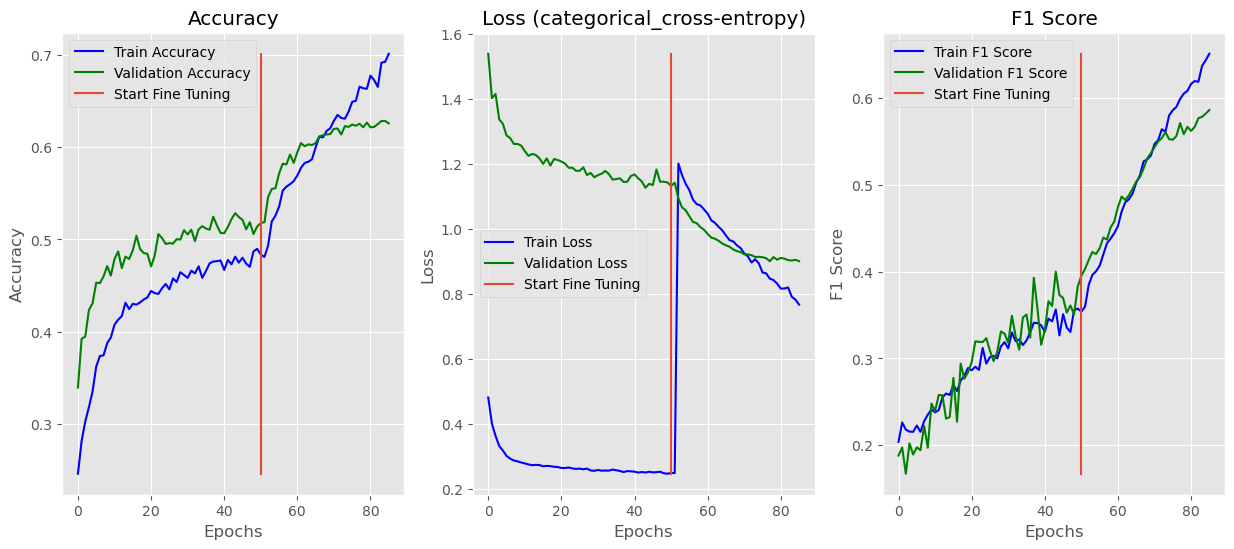

In [42]:
# Plot the Training and Test accuracy over all the epochs
fig2, ax2 = plt.subplots(1, 3, figsize = (15, 6))
#fig1.subtitle('CNN Model', c = 'k', fontsize = '15')

ax2[0].plot(acc_ft, 'b-', label = 'Train Accuracy')
ax2[0].plot(val_acc_ft, 'g-', label = 'Validation Accuracy')   
ax2[0].plot([fit_history1.epoch[-1] - 1, 
             fit_history1.epoch[-1] - 1], 
            [min(min(acc), min(acc_ft), min(val_acc), min(val_acc_ft)), max(max(acc), max(acc_ft), max(val_acc), max(val_acc_ft))],
            label = 'Start Fine Tuning')
ax2[0].set_title('Accuracy')
ax2[0].legend()
ax2[0].set_xlabel('Epochs')
ax2[0].set_ylabel('Accuracy')

ax2[1].plot(loss_ft, 'b-', label = 'Train Loss')
ax2[1].plot(val_loss_ft, 'g-', label = 'Validation Loss')
ax2[1].plot([fit_history1.epoch[-1] - 1, 
             fit_history1.epoch[-1] - 1], 
            [min(min(loss), min(loss_ft), min(val_loss), min(val_loss_ft)), max(max(loss), max(loss_ft), max(val_loss), max(val_loss_ft))], 
            label = 'Start Fine Tuning')
ax2[1].set_title('Loss (' + loss_func.name + ')')
ax2[1].legend()
ax2[1].set_xlabel('Epochs')                                             
ax2[1].set_ylabel('Loss')

ax2[2].plot(f1_ft, 'b-', label = 'Train F1 Score')
ax2[2].plot(val_f1_ft, 'g-', label = 'Validation F1 Score')
ax2[2].plot([fit_history1.epoch[-1] - 1, 
             fit_history1.epoch[-1] - 1], 
            [min(min(f1), min(f1_ft), min(val_f1), min(val_f1_ft)), max(max(f1), max(f1_ft), max(val_f1), max(val_f1_ft))], 
            label = 'Start Fine Tuning')
ax2[2].set_title('F1 Score')
ax2[2].legend()
ax2[2].set_xlabel('Epochs')                                             
ax2[2].set_ylabel('F1 Score')

plt.show()
fig2.savefig('Model_plot_ft.jpg')

In [43]:
# Show Fine-Tuned Model output
ft_val_loss, ft_val_acc, ft_val_f1 = model1.evaluate(ds_val)

19/19 [==============================] - 2s 105ms/step - loss: 0.9011 - accuracy: 0.6259 - f1_score: 0.5866


#### Display Predicted Emotions from the Validation Dataset<a id='step7.d'></a>

To subjectively evaluate the model performance, we visualize the predicted labeling for the validation data set. 

[Return to the Project Outline](#outline)

In [44]:
# Recall the Validation data set
ds_val = image_dataset_from_directory(
    img_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = True,
    seed = seed,
    validation_split = .2,
    subset = 'validation')

Found 9325 files belonging to 5 classes.
Using 1865 files for validation.


In [45]:
# Get validation predictions
val_probs = model1.predict(ds_val)

15/15 [==============================] - 9s 242ms/step


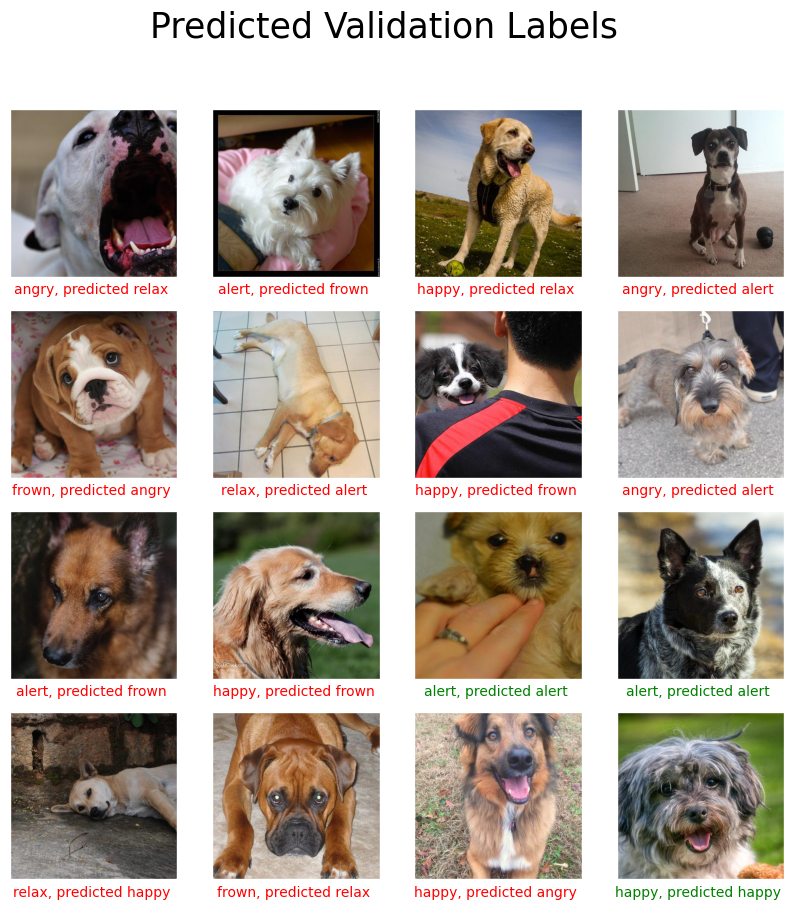

In [46]:
# Set total number of images to plot
num_pics = 16

# Select a random starting point in data set for image prediction selection
start_index = random.randint(0, len(ds_val.file_paths) - num_pics)

# Set new plot subclasses to iterate over random predictions
fig3, ax3 = plt.subplots(figsize = (10, 10))
ax3.remove()

for i in range(num_pics):
    fig3.suptitle('Predicted Validation Labels', size = 25)
    plt.subplot(int(np.sqrt(num_pics)), int(np.sqrt(num_pics)), i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(val_probs[[start_index + i]])
    if pred == 0:
        pred = class_names[0] 
    elif pred == 1:
        pred = class_names[1] 
    elif pred == 2:
        pred = class_names[2]
    elif pred == 3:
        pred = class_names[3]
    else:
        pred = class_names[4]
    
    actual = ds_val.file_paths[start_index + i][85:90]
    
    if pred != actual:
        col = 'r'
    else:
        col = 'g'
    
    plt.xlabel('{}, predicted {} '.format(actual, pred), 
               color = col, fontsize = 10)
    plt.imshow(load_img(ds_val.file_paths[start_index + i]))
    
    plt.tight_layout

## Final CNN Model Confusion Matrix<a id='step8'></a>

A key evaluation step is to review the confusion matrix. Accuracy alone is deceiving and does not well represent the performance across five classes (which is why the F1 Score was included as a model metric).

Of particular interest is the F1 Score for each class, as part of my secondary model evaluation objectives to monitor and maximize ($> \ 25\%$ `F1 Score` for each class).

The secondary objective was to satisfy a series of performance metrics (prioritized):
#### 1. Consistently classify the opening image of Rogi as *happy*.
- The objective was consistently met, as seen in the history of the [model performance table](#step10).
#### 2. Achieve $>= 70\%$ validation accuracy.
- The objective was not met. I achieved the best accuracy of approximately $63\%$. Most models would peak between $59$-$60\%$.
#### 3. Achieve class F1 Scores of $>= 25\%$.
- The objective was not met. I achieved the best `F1 Score` of approximately $1.4$. Like objective #$2$, the majority of F1 Scores would peak between $19$-$23\%$.

[Return to the Project Outline](#outline)

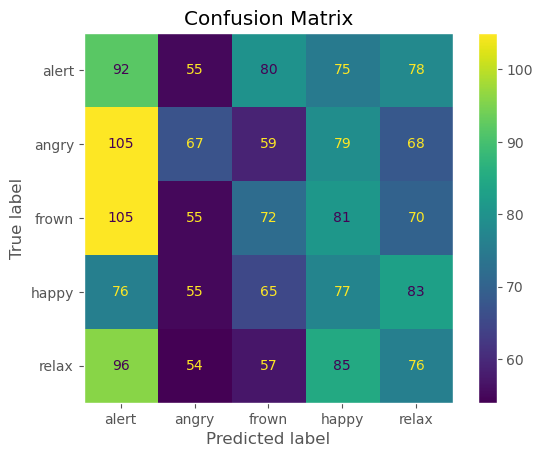

              precision    recall  f1-score   support

       alert       0.24      0.19      0.22       474
       angry       0.18      0.23      0.20       286
       frown       0.19      0.22      0.20       333
       happy       0.22      0.19      0.20       397
       relax       0.21      0.20      0.20       375

    accuracy                           0.21      1865
   macro avg       0.21      0.21      0.21      1865
weighted avg       0.21      0.21      0.21      1865



In [47]:
#build out the confusion matrix
val_preds = list(val_probs.argmax(axis = 1))

val_labels = [label[85:90] for label in ds_val.file_paths]

lab_encoder = preprocessing.LabelEncoder()
lab_encoder.fit(val_labels)
val_actual_labels = lab_encoder.transform(val_labels)

def cm_plot_metrics(actual_labels, pred_labels, label_names):
    cm = confusion_matrix(actual_labels, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                  display_labels = label_names)
    
    disp.plot()
    plt.grid(False)
    plt.title('Confusion Matrix')
    plt.show()
    
    print(classification_report(pred_labels, actual_labels, 
                                target_names = label_names))

cm_plot_metrics(val_actual_labels, 
                val_preds, 
                class_names)

## Final CNN Model Evaluation on Unseen Images of Perogi<a id='step9'></a>

This step, while purely subjective, is arguably the most important. If the customer or user doesn't agree with the model's predicted emotion labels for Perogi, then nothing else matters. The secondary objective metrics are critical for statistical significance to validate the model's ability to effectively train on the dataset and generalize to a validation dataset (to a degree, without a separate test dataset).

The $201$ images of Perogi represent unseen and unlabeled images, however. the "true" or "actual" labels exist in the opinion of my wife. In my opinion, the model did exceptionally well on the Perogi images - I would agree with nearly all the labels. 

Unfortunately, my wife wasn't as impressed. This was insightful in that the determination of what would appear for my wife as *happy* versus *sad* or *angry* for Perogi is extremely subjective and tied to memories that are associated with the pictures.

Dogs are highly expressive animals, and the human's perspective of what a *happy* dog looks like can be extremely skewed and influenced by unrelated factors (i.e., a dog's mouth formed in such a way that looks like a human smile).

Nevertheless, the final takeaway is that this model requires the customer's involvement from the beginning when I cleaned and relabeled the full training dataset. The relabeling of the full training dataset is $100\%$ representative of my opinion about what an *alert*, *angry*, *frown*, *happy*, and *sad* dog looks like, and not my wife's opinion.

[Return to the Project Outline](#outline)

#### Read in Rogi Images

In [48]:
directory_path = r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images'

# Create dataset for unseen Rogi images
ds_rogi = tf.keras.utils.image_dataset_from_directory(
    directory_path,
    labels = None,  # Labels will be inferred from subdirectory names
    class_names = None,  # Class names will be inferred
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = False,  # No need to shuffle for unseen data
    seed = seed
)

Found 212 files belonging to 1 classes.


#### Predict and Plot Perogi's Emotions

[Return to the Project Outline](#outline)

In [49]:
# Predict Rogi label probabilities
rogi_probs = model1.predict(ds_rogi)

2/2 [==============================] - 6s 2s/step


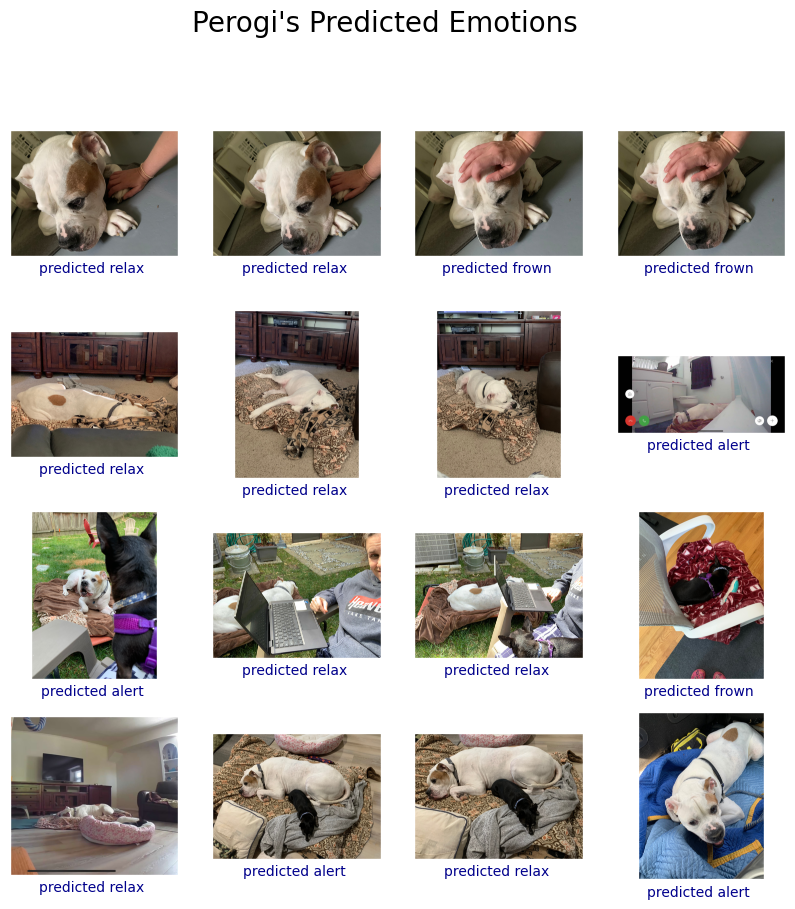

In [50]:
# Select a random starting point in data set for image prediction selection
start_index = random.randint(0, len(ds_rogi.file_paths) - num_pics)

# Set new plot subclasses to iterate over random predictions
fig4, ax4 = plt.subplots(figsize = (10, 10))
fig4.suptitle('Perogi\'s Predicted Emotions', size = 20)
ax4.remove()

for i in range(num_pics):
    
    plt.subplot(int(np.sqrt(num_pics)), int(np.sqrt(num_pics)), i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(rogi_probs[[start_index + i]])
    if pred == 0:
        pred = class_names[0] 
    elif pred == 1:
        pred = class_names[1] 
    elif pred == 2:
        pred = class_names[2]
    elif pred == 3:
        pred = class_names[3]
    else:
        pred = class_names[4]
    
    plt.xlabel('predicted {} '.format(pred), color = 'darkblue', fontsize = 10)
    plt.imshow(load_img(ds_rogi.file_paths[start_index + i]))

    plt.tight_layout

1/1 [==============================] - 1s 1s/step


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

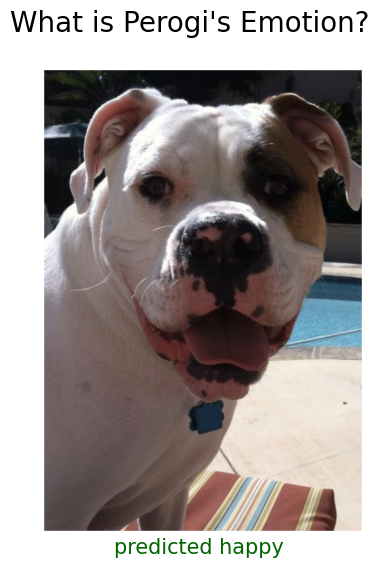

In [51]:
#Run the model on the introduction image of Perogi

def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (img_size, img_size, 3))
   np_image = np.expand_dims(np_image, axis = 0)
   return np_image

intro_image_pred = model1.predict(load(r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images/IMG_7415.jpg'))

# Set new plot subclasses to iterate over random predictions
fig5, ax5 = plt.subplots(figsize = (10, 6))
fig5.suptitle('What is Perogi\'s Emotion?', size = 20)
ax5.remove()

plt.grid(False)
plt.xticks([])
plt.yticks([])

pred = np.argmax(intro_image_pred)
if pred == 0:
    pred = class_names[0] 
elif pred == 1:
    pred = class_names[1] 
elif pred == 2:
    pred = class_names[2]
elif pred == 3:
    pred = class_names[3]
else:
    pred = class_names[4]

if pred == 'happy':
    color = 'darkgreen'
else:
    color = 'red'
plt.xlabel('predicted {} '.format(pred), color = color, fontsize = 15)
plt.imshow(load_img(r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images/IMG_7415.jpg'))

plt.tight_layout

## Project Summary and Metrics History Review<a id='step10'></a>

This final summary of metrics was used to help guide modeling design. It heuristically captures key metrics that list the progression of model development for iterative decision making to achieve secondary objective metrics.

Ultimately, I found that out-of-the-box, transfer learning with fine-tuning on all convolutional layers was highly effective and easily outperformed my `VGGNet` inspired baseline model. However, after iterative training on over 220 variations of the transfer learning model with fine tuning, I found performance peaked at approximately $63\%$ accuracy and $0.9$ categorical cross-entropy. 

I couldn't find a better combination of dense layers, channels, dropout, and batch normalization that would stop overfitting to accuracy, and degradation to categorical cross-entropy. Adding a CNN with max pooling prior to the top fully connected layer provided no gains. Additional dense layer depth also provided no gains in performance.

In studying the `VGGNet` and `AlexNet` architectures, I regrettably was not able to produce those models on my machine with the same image size $224 x 224$ due to limited computer resources to handle the large parameter sizes. My machine and GPU could only handle a maximum image size of $128 x 128$, which I suspect may result in information loss and limited performance.

However, despite the inability to find an additional $15\%$ of accuracy and class `F1 Scores` of $> 25\%$, I am satisfied with how the model on unseen data, specifically in classifying Perogi's emotions. While my wife generally agrees, she is completely convinced the model did well. Ultimately, the training data was designed around my perception of what an *alert*, *angry*, *frown*, *happy*, and *relax* dog should look like, and not my wife's. This is a critical lesson to be learned - the customer needs to be involved throughout the problem framing, data engineering, model development, and model evaluation process. We collaborated in the problem framing and evaluation process, but never in the data engineering (or cleaning) and modeling process, resulting in a model that met my expectations and not the customer's.

[Return to the Project Outline](#outline)

In [52]:
# Check if the file already exists in the working directory
file_path = 'top_model_testing_df_ft_dropout.csv'

if not os.path.exists(file_path):
    # Create a new DataFrame
    top_model_testing_df_ft_dropout = pd.DataFrame(columns = [
        'ID', 'Accuracy', 'F1 Score', 'Loss', 'Composite Score', 'Rogi Happy', 
        'Training Time', 'Epochs', 'Batch Size', 'Hidden Activation', 
        'Output Activation', 'Optimizer', 'Top CNN Layer', '# Hidden Layers', 
        'Start Node', 'End Node', 'Start Dropout', 'End Dropout','Fine Tuning Layer'
    ])

    # Save the DataFrame to a CSV file
    top_model_testing_df_ft_dropout.to_csv(file_path, 
                                 index = False)
    
    print(f"DataFrame saved to {file_path}")
    
else:
    # Load the existing DataFrame
    top_model_testing_df_ft_dropout = pd.read_csv(file_path)

# Create a new row entry
ID = len(top_model_testing_df_ft_dropout.index) + 1
acc = ft_val_acc
f1 = ft_val_f1
loss = ft_val_loss

rogi_happy = pred
time = str(tl_time + ft_time)
epoch = len(history1_fine.epoch) + len(fit_history1.epoch) - 1
batch = batch_size
h_act = layer_act.name
o_act = out_act
opt = opt_ft.name
tlm = tl_model.name
top_cnn = any(isinstance(layer, Conv2D) for layer in model1.layers)

# Extracting details of the top fully connected layer
top_FC_layer = model1.get_layer('Top_Dense_Layers')
hidden_layers = [layer for layer in top_FC_layer.layers if isinstance(layer, Dense)]
hidden_layer_count = len(hidden_layers)

start_node = hidden_layers[-1].units if hidden_layers else None
end_node = hidden_layers[0].units if hidden_layers else None

drop_1 = FC_drop_1
drop_2 = FC_drop_2

ft_layer = fine_tune_layer

# Add the new data to the DataFrame
new_row = {
    'ID': ID, 
    'Accuracy': acc, 
    'F1 Score': f1, 
    'Loss': loss, 
    'Composite Score': None,  # Placeholder for now
    'Rogi Happy': rogi_happy, 
    'Training Time': time, 
    'Epochs': epoch, 
    'Batch Size': batch,
    'Hidden Activation': h_act, 
    'Output Activation': o_act, 
    'Optimizer': opt, 
    'Top CNN Layer': top_cnn, 
    '# Hidden Layers': hidden_layer_count,
    'Start Node': start_node, 
    'End Node': end_node, 
    'Start Dropout': drop_1, 
    'End Dropout': drop_2,
    'Fine Tuning Layer': ft_layer
}

top_model_testing_df_ft_dropout = pd.concat([top_model_testing_df_ft_dropout, 
                                   pd.DataFrame([new_row])], 
                                  ignore_index = True)

# Recompute Composite Score for all rows
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(top_model_testing_df_ft_dropout[['Accuracy', 'F1 Score', 'Loss']])
top_model_testing_df_ft_dropout['Composite Score'] = (normalized_values[:, 0] * (1/3)) + (normalized_values[:, 1] * (1/3)) + ((1 - normalized_values[:, 2]) * (1/3))

# Save the updated DataFrame to the same file
top_model_testing_df_ft_dropout.to_csv(file_path, index = False)
print(f"DataFrame updated and saved to {file_path}")

DataFrame updated and saved to top_model_testing_df_ft_dropout.csv


In [53]:
# Review the current iteration of model test:
#1. Various cominations of nodes (32-4096) of batch size 16 (103 total models);
#2. Top 10 Composite Scores (normalized) of batch size 16 models tested to batch sizes 16, 32, 64, 128 (40 total models); 
#3. Top 10 of all batch size models test with dropout 0.2, 0.4, 0.6, 0.8 (40 total models);
#4. Top 10 of all dropout models with fine-tuning at 4 different unfrozen layers (40 total models)
#5. Final model selection
top_model_testing_df_ft_dropout

ID  Accuracy  F1 Score      Loss  Composite Score Rogi Happy  \
0    1  0.631918  0.588212  0.912251         0.972413      happy   
1    2  0.618190  0.593166  0.938103         0.953322      happy   
2    3  0.622480  0.592082  0.950216         0.950675      happy   
3    4  0.615616  0.588421  0.938011         0.948796      happy   
4    5  0.612184  0.565557  0.946121         0.930061      happy   
5    6  0.603604  0.592266  0.982181         0.922358      happy   
6    7  0.605320  0.581046  0.976243         0.920110      happy   
7    8  0.603604  0.579999  0.992292         0.911179      happy   
8    9  0.547405  0.494374  1.091925         0.777578      happy   
9   10  0.547834  0.496803  1.107507         0.772395      frown   
10  11  0.630202  0.586006  0.920143         0.966428      happy   
11  12  0.617761  0.592760  0.945081         0.949708      happy   
12  13  0.617761  0.581570  0.944268         0.943918      happy   
13  14  0.632776  0.584847  0.899373         0.976874      happy   
14  15  0.618619  0.578808  0.924006         0.951954      happy   
15  16  0.621193  0.583173  0.908904         0.962946      happy   
16  17  0.625912  0.588689  0.897694         0.974493      happy   
17  18  0.635350  0.603180  0.904039         0.986856      happy   
18  19  0.638353  0.606863  0.900010         0.992936      happy   
19  20  0.632776  0.598464  0.883926         0.991138      happy   
20  21  0.633205  0.597530  0.891149         0.987780      happy   
21  22  0.627199  0.598343  0.890774         0.983815      happy   
22  23  0.217932  0.000000  1.642874         0.013072      relax   
23  24  0.200772  0.000000  1.633086         0.004299      relax   
24  25  0.610897  0.576700  0.955477         0.931092      happy   
25  26  0.624625  0.569946  0.909176         0.958175      happy   
26  27  0.624196  0.594489  0.909673         0.971111      happy   
27  28  0.609181  0.579187  0.980715         0.920066      alert   
28  29  0.600601  0.572867  0.958627         0.919760      alert   
29  30  0.635779  0.594375  0.915719         0.977216      happy   
30  31  0.625912  0.586552  0.901055         0.971844      happy   

     Training Time  Epochs  Batch Size Hidden Activation Output Activation  \
0          22:03.2      69         128        leaky_relu           softmax   
1          17:03.9      44         128        leaky_relu           softmax   
2          18:47.4      53         128        leaky_relu           softmax   
3          19:23.3      61         128        leaky_relu           softmax   
4          20:07.4      56         128        leaky_relu           softmax   
5          19:50.3      69         128        leaky_relu           softmax   
6          16:52.1      43         128        leaky_relu           softmax   
7          15:08.3      49         128        leaky_relu           softmax   
8          09:54.1      54         128        leaky_relu           softmax   
9          07:46.0      40         128        leaky_relu           softmax   
10  0:20:52.528677      62         128        leaky_relu           softmax   
11  0:18:10.506063      54         128        leaky_relu           softmax   
12  0:18:10.806247      54         128        leaky_relu           softmax   
13  0:25:43.372936      80         128        leaky_relu           softmax   
14  0:20:21.629788      64         128        leaky_relu           softmax   
15  0:18:20.741672      53         128        leaky_relu           softmax   
16  0:29:03.366774      96         128        leaky_relu           softmax   
17  0:27:00.892925      93         128        leaky_relu           softmax   
18  0:24:57.901511      87         128        leaky_relu           softmax   
19  0:26:17.544537      91         128        leaky_relu           softmax   
20  0:20:48.979032      65         128        leaky_relu           softmax   
21  0:21:09.850014      62         128        leaky_relu           softmax   
22  0:06:53.987288      18       

In [54]:
# Top Ten overal models
top_ft_df_do = pd.read_csv('top_model_testing_df_ft_dropout.csv')
top_ft_df_do.sort_values(by = 'Composite Score', ascending = False).head(10)
#######################
# 128 epochs, .2 and .4 dropout at 6h, 6a, 5a, 4a, 3a, 2a, 1a layers
# 3x256 nodes
# 5x512 nodes
# 1024-256 nodes
# 2048-1024 nodes
#######################
# 128 epochs, 0.0-0.4, 0.2-0.6, 0.4-0.8, 0.0-0.8 dropouts with all layers
# 3x256 nodes
# 5x512 nodes
# 1024-256 nodes - best model .4-.8 dropout, all layers

ID  Accuracy  F1 Score      Loss  Composite Score Rogi Happy  \
18  19  0.638353  0.606863  0.900010         0.992936      happy   
19  20  0.632776  0.598464  0.883926         0.991138      happy   
20  21  0.633205  0.597530  0.891149         0.987780      happy   
17  18  0.635350  0.603180  0.904039         0.986856      happy   
21  22  0.627199  0.598343  0.890774         0.983815      happy   
29  30  0.635779  0.594375  0.915719         0.977216      happy   
13  14  0.632776  0.584847  0.899373         0.976874      happy   
16  17  0.625912  0.588689  0.897694         0.974493      happy   
0    1  0.631918  0.588212  0.912251         0.972413      happy   
30  31  0.625912  0.586552  0.901055         0.971844      happy   

     Training Time  Epochs  Batch Size Hidden Activation Output Activation  \
18  0:24:57.901511      87         128        leaky_relu           softmax   
19  0:26:17.544537      91         128        leaky_relu           softmax   
20  0:20:48.979032      65         128        leaky_relu           softmax   
17  0:27:00.892925      93         128        leaky_relu           softmax   
21  0:21:09.850014      62         128        leaky_relu           softmax   
29  0:26:01.533050      94         128        leaky_relu           softmax   
13  0:25:43.372936      80         128        leaky_relu           softmax   
16  0:29:03.366774      96         128        leaky_relu           softmax   
0          22:03.2      69         128        leaky_relu           softmax   
30  0:23:17.010671      85         128        leaky_relu           softmax   

   Optimizer  Top CNN Layer  # Hidden Layers  Start Node  End Node  \
18   adam_ft          False                3        1024       256   
19   adam_ft          False                3         256       256   
20   adam_ft          False                5         512       512   
17   adam_ft          False                5         512       512   
21   adam_ft          False                3        1024       256   
29   adam_ft          False                3        1024       256   
13   adam_ft          False                3         256       256   
16   adam_ft          False                3         256       256   
0    adam_ft          False                3         256       256   
30   adam_ft          False                3        1024       256   

    Start Dropout  End Dropout Fine Tuning Layer  
18            0.4          0.8              Full  
19            0.0          0.8              Full  
20            0.0          0.8              Full  
17            0.4          0.8              Full  
21            0.0          0.8              Full  
29            0.4          0.8              Full  
13            0.2          0.6              Full  
16            0.4          0.8              Full  
0             0.4          0.4              Full  
30            0.4          0.8              Full


[Return to the CNN Transfer Learning Model Set-up](#step6.c)

## References<a id='ref'></a>
1. Andrade, D. (2024). Dog Emotions - 5 Classes [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8330954.<a id='ref1'></a>
2. Chollet, F. (2021). Deep Learning with Python (2nd ed.). Manning Publications Co.<a id='ref2'></a>
3. Chollet, F. (2024, April 24). Transfer learning & fine-tuning: Tensorflow Core. TensorFlow. https://www.tensorflow.org/guide/keras/transfer_learning<a id='ref3'></a>
4. Devzohaib. (2022, October 3). Dog emotions prediction. Kaggle.https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction<a id='ref4'></a>
5. Gareth, J. Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). An introduction to statistical Learning with applications in Python. Springer. <a id='ref5'></a>
6. Keras: tensorflow V2.15.0. TensorFlow. (n.d.). https://www.tensorflow.org/api_docs/python/tf/keras<a id='ref6'></a>
7. Kingma, D. P., & Ba, J. (2015). Adam: A method for stochastic optimization. International Conference on Learning Representations. https://doi.org/10.48550/arXiv.1412.6980<a id='ref7'></a>
8. Krohn, J., Beyleveld, G., & Bassens, A. (2020). Deep learning illustrated: A visual, interactive guide to artificial intelligence. Addison-Wesley.<a id='re8'></a>
9. Simonyan, K. and Zisserman, A. (2015) Very Deep Convolutional Networks for Large-Scale Image Recognition. The 3rd International Conference on Learning Representations (ICLR2015). https://doi.org/10.48550/arXiv.1409.1556<a id='ref9'></a>
10. Tan, M., & Le, Q. V. (2021). EfficientNetV2: Smaller Models and Faster Training. International Conference on Machine Learning. https://doi.org/10.48550/arXiv.2104.00298.<a id='ref10'></a>
11. TensorFlow API: EfficentNetV2S. (n.d.). https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetV2S<a id='ref11'></a>


[Return to the Project Outline](#outline)

<!-- Include custom CSS file for PDF output -->
<link rel="stylesheet" type="text/css" href="custom.css">